In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "MIG-166d7783-762d-5f61-b31c-549eb4e0fba0"

In [2]:
import sys
sys.path.append('../2_train_models')

import os
import numpy as np
import matplotlib.pyplot as plt

from data_loading import extract_peaks

In [3]:
cell_type, model_type = "K562", "strand_merged_umap"
cage_or_rampage = "rampage"

In [4]:
# load filepaths and other info from configs

from file_configs import MergedFilesConfig

configs = dict()
configs["procap"] = MergedFilesConfig(cell_type, model_type, data_type = "procap")
configs[cage_or_rampage] = MergedFilesConfig(cell_type, model_type, data_type = cage_or_rampage)

assert configs["procap"].genome_path == configs[cage_or_rampage].genome_path
assert configs["procap"].chrom_sizes == configs[cage_or_rampage].chrom_sizes
assert configs["procap"].stranded_model == configs[cage_or_rampage].stranded_model

in_window = 2114
out_window = 1000

genome_path = configs["procap"].genome_path
chrom_sizes = configs["procap"].chrom_sizes
stranded = configs["procap"].stranded_model

all_peak_paths = {expt : configs[expt].all_peak_path for expt in configs.keys()}

plus_bw_paths = {expt : configs[expt].plus_bw_path for expt in configs.keys()}
minus_bw_paths = {expt : configs[expt].minus_bw_path for expt in configs.keys()}

figures_dir = configs["procap"].proj_dir + "figures/"

In [5]:
# since we need to generate new predictions

from file_configs import FoldFilesConfig

cage_timestamps = ["2023-09-13_21-57-36", "2023-09-13_23-37-50", "2023-09-14_01-07-10",
                   "2023-09-14_02-28-40", "2023-09-14_03-25-49", "2023-09-14_04-44-39",
                   "2023-09-14_05-56-16"]

# using the fold5 model since MALAT1 (example below) was in test chroms
#procap_timestamp = "2023-05-29_15-51-40"
#procap_timestamp = "2023-05-29_23-21-23"
procap_timestamps = ["2023-05-29_15-51-40", "2023-05-29_15-58-41", "2023-05-29_15-59-09",
                     "2023-05-30_01-40-06", "2023-05-29_23-21-23", "2023-05-29_23-23-45",
                     "2023-05-29_23-24-11"]

# "1" below actually doesn't do anything; folds are known by timestamp after training
fold_configs_cage = [FoldFilesConfig(cell_type, model_type, "1", timestamp, data_type=cage_or_rampage) for timestamp in cage_timestamps]
fold_configs_procap = [FoldFilesConfig(cell_type, model_type, "1", timestamp, data_type="procap") for timestamp in procap_timestamps]


Timestamp: 2023-09-13_21-57-36
Timestamp: 2023-09-13_23-37-50
Timestamp: 2023-09-14_01-07-10
Timestamp: 2023-09-14_02-28-40
Timestamp: 2023-09-14_03-25-49
Timestamp: 2023-09-14_04-44-39
Timestamp: 2023-09-14_05-56-16
Timestamp: 2023-05-29_15-51-40
Timestamp: 2023-05-29_15-58-41
Timestamp: 2023-05-29_15-59-09
Timestamp: 2023-05-30_01-40-06
Timestamp: 2023-05-29_23-21-23
Timestamp: 2023-05-29_23-23-45
Timestamp: 2023-05-29_23-24-11


In [6]:
# load observed read counts

onehot_seqs, true_profs_procap = extract_peaks(genome_path, chrom_sizes,
                                  plus_bw_paths["procap"], minus_bw_paths["procap"],
                                  all_peak_paths["procap"],
                                  in_window=in_window,
                                  out_window=out_window,
                                  max_jitter=0, verbose=True)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:35<00:00,  1.48s/it]
Loading Peaks: 30534it [00:40, 755.65it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 30534
Mask loaded? False


In [9]:
_, true_profs_cage = extract_peaks(genome_path, chrom_sizes,
                                  plus_bw_paths[cage_or_rampage], minus_bw_paths[cage_or_rampage],
                                  all_peak_paths["procap"],
                                  in_window=in_window,
                                  out_window=out_window,
                                  max_jitter=0, verbose=True)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.51it/s]
Loading Peaks: 30534it [00:39, 777.20it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 30534
Mask loaded? False


In [10]:
onehot_seqs_cagepeaks, true_profs_cage_cagepeaks = extract_peaks(genome_path, chrom_sizes,
                                  plus_bw_paths[cage_or_rampage], minus_bw_paths[cage_or_rampage],
                                  all_peak_paths[cage_or_rampage],
                                  in_window=in_window,
                                  out_window=out_window,
                                  max_jitter=0, verbose=True)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.43it/s]
Loading Peaks: 14685it [00:18, 777.24it/s]


== In Extract Peaks ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks.bed.gz
Sequence length (with jitter): 2114
Profile length (with jitter): 1000
Max jitter applied: 0
Num. Examples: 14685
Mask loaded? False


In [11]:
true_counts_procap = true_profs_procap.sum(axis=(-1,-2))
true_counts_cage = true_profs_cage.sum(axis=(-1,-2))
true_counts_cage_cagepeaks = true_profs_cage_cagepeaks.sum(axis=(-1,-2))

In [12]:
pred_logcounts_procap = np.load(configs["procap"].pred_logcounts_all_path).squeeze()
pred_counts_procap = np.exp(pred_logcounts_procap)

In [161]:
import torch
sys.path.append("../3_eval_models")
from eval_utils import model_predict_with_rc


def load_model(model_path):
    model = torch.load(model_path)
    model.eval()
    model = model.cuda()
    return model

def generate_pred_logcounts(onehot_seqs, model):
    _, pred_logcounts = model_predict_with_rc(model, onehot_seqs)
    return pred_logcounts.squeeze()

def generate_pred_logcounts_all_folds(onehot_seqs, fold_configs):
    pred_logcounts_all_folds = []
    for fold_config in fold_configs:
        print(fold_config.timestamp)
        model = load_model(fold_config.model_save_path)
        
        pred_logcounts = generate_pred_logcounts(onehot_seqs, model)
        pred_logcounts_all_folds.append(pred_logcounts)
        
    return np.array(pred_logcounts_all_folds).mean(axis=0)

pred_logcounts_cage = generate_pred_logcounts_all_folds(onehot_seqs, fold_configs_cage)
# can't actually do this for the cagepeaks because we need to eval each fold-model on its test set,
# rather than merging all preds genome wide for all fold-models
#pred_logcounts_cage_cagepeaks = generate_pred_logcounts_all_folds(onehot_seqs_cagepeaks, fold_configs_cage)

In [60]:
from common_functions import load_coords
from collections import defaultdict
from data_loading import extract_observed_profiles

def get_sort_order_test_sets(cell_type, model_type, data_type, timestamps):
    # the way I loaded in the test sets fold-by-fold,
    # the examples are not in the same order as the all_peaks_bed file order
    # so this function figures out how to reorder the test set data
    
    test_coords = []
    
    for fold_0_index, timestamp in enumerate(timestamps):
        fold = str(fold_0_index + 1)
        config = FoldFilesConfig(cell_type, model_type, fold, timestamp, data_type)
        
        test_coords.extend(load_coords(config.test_peak_path, in_window))
        
    # this contains the same coords at test_coords, but in the correct order this time
    merged_config = MergedFilesConfig(cell_type, model_type, data_type)
    all_coords = load_coords(merged_config.all_peak_path, in_window)
    
    sort_order = [test_coords.index(coord) for coord in all_coords]
    assert np.all(np.array(all_coords) == np.array(test_coords)[sort_order])
    
    return sort_order


def load_test_data(cell_type, model_type, data_types_to_timestamps):
    pr1_profs = defaultdict(lambda : [])
    pr2_profs = defaultdict(lambda : [])
    log_pred_profs = defaultdict(lambda : [])
    pred_logcounts = defaultdict(lambda : [])
    
    for data_type, timestamps in data_types_to_timestamps.items():
        for fold_0_index, timestamp in enumerate(timestamps):
            fold = str(fold_0_index + 1)  # doesn't matter bc we use timestamp
            config = FoldFilesConfig(cell_type, model_type, fold, timestamp, data_type)

            pr1 = extract_observed_profiles(get_pseudorep_filepaths(config, 1, "pos"),
                                           get_pseudorep_filepaths(config, 1, "neg"),
                                           config.test_peak_path,
                                           out_window=out_window,
                                           verbose=True)
            pr1_profs[data_type].extend(pr1)

            pr2 = extract_observed_profiles(get_pseudorep_filepaths(config, 2, "pos"),
                                           get_pseudorep_filepaths(config, 2, "neg"),
                                           config.test_peak_path,
                                           out_window=out_window,
                                           verbose=True)
            pr2_profs[data_type].extend(pr2)
            
            log_pred_profs[data_type].extend(np.load(config.pred_profiles_test_path))
            pred_logcounts[data_type].extend(np.load(config.pred_logcounts_test_path))

        pr1_profs[data_type] = np.array(pr1_profs[data_type])
        pr2_profs[data_type] = np.array(pr2_profs[data_type])
        log_pred_profs[data_type] = np.array(log_pred_profs[data_type])
        pred_logcounts[data_type] = np.array(pred_logcounts[data_type])

        sort_order = get_sort_order_test_sets(cell_type, model_type, data_type, timestamps)

        pr1_profs[data_type] = pr1_profs[data_type][sort_order]
        pr2_profs[data_type] = pr2_profs[data_type][sort_order]
        log_pred_profs[data_type] = log_pred_profs[data_type][sort_order]
        pred_logcounts[data_type] = pred_logcounts[data_type][sort_order]
    
    return pr1_profs, pr2_profs, log_pred_profs, pred_logcounts


pr1_profs, pr2_profs, log_pred_profs_test, pred_logcounts_test = load_test_data(cell_type, model_type,
                                      {"procap" : procap_timestamps,
                                       cage_or_rampage : cage_timestamps})

Timestamp: 2023-05-29_15-51-40


Loading Profiles: 4334it [00:01, 4071.56it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 4334



Loading Profiles: 4334it [00:01, 4165.50it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 4334


Timestamp: 2023-05-29_15-58-41


Loading Profiles: 3699it [00:00, 4531.40it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 3699



Loading Profiles: 3699it [00:00, 4764.42it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 3699


Timestamp: 2023-05-29_15-59-09


Loading Profiles: 4559it [00:00, 4736.16it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 4559



Loading Profiles: 4559it [00:00, 4816.55it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 4559


Timestamp: 2023-05-30_01-40-06


Loading Profiles: 3887it [00:00, 4774.42it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 3887



Loading Profiles: 3887it [00:00, 4788.42it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 3887


Timestamp: 2023-05-29_23-21-23


Loading Profiles: 4470it [00:00, 4795.81it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 4470



Loading Profiles: 4470it [00:00, 4747.87it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 4470


Timestamp: 2023-05-29_23-23-45


Loading Profiles: 5238it [00:01, 4763.13it/s]


== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 5238


Loading Profiles: 5238it [00:01, 4761.63it/s]


== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 5238
Timestamp: 2023-05-29_23-24-11


Loading Profiles: 4347it [00:00, 4800.63it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 4347



Loading Profiles: 4347it [00:00, 4833.50it/s]


== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/procap/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 4347
Timestamp: 2023-05-29_15-51-40
Timestamp: 2023-05-29_15-58-41
Timestamp: 2023-05-29_15-59-09
Timestamp: 2023-05-30_01-40-06
Timestamp: 2023-05-29_23-21-23
Timestamp: 2023-05-29_23-23-45
Timestamp: 2023-05-29_23-24-11
Timestamp: 2023-09-13_21-57-36


Loading Profiles: 2077it [00:00, 3096.95it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 2077



Loading Profiles: 2077it [00:00, 3166.32it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold1_test.bed.gz
Profile length: 1000
Num. Examples: 2077


Timestamp: 2023-09-13_23-37-50


Loading Profiles: 1881it [00:00, 3365.57it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 1881



Loading Profiles: 1881it [00:00, 3547.24it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold2_test.bed.gz
Profile length: 1000
Num. Examples: 1881


Timestamp: 2023-09-14_01-07-10


Loading Profiles: 2091it [00:00, 4372.75it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 2091



Loading Profiles: 2091it [00:00, 4393.11it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold3_test.bed.gz
Profile length: 1000
Num. Examples: 2091


Timestamp: 2023-09-14_02-28-40


Loading Profiles: 1732it [00:00, 3794.99it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 1732



Loading Profiles: 1732it [00:00, 4139.17it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold4_test.bed.gz
Profile length: 1000
Num. Examples: 1732


Timestamp: 2023-09-14_03-25-49


Loading Profiles: 2155it [00:00, 4347.53it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 2155



Loading Profiles: 2155it [00:00, 4489.28it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold5_test.bed.gz
Profile length: 1000
Num. Examples: 2155


Timestamp: 2023-09-14_04-44-39


Loading Profiles: 2520it [00:00, 4382.15it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 2520



Loading Profiles: 2520it [00:00, 4603.26it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold6_test.bed.gz
Profile length: 1000
Num. Examples: 2520


Timestamp: 2023-09-14_05-56-16


Loading Profiles: 2229it [00:00, 4170.86it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 2229



Loading Profiles: 2229it [00:00, 4289.19it/s]

== In Extract Profiles ==
Peak filepath: /mnt/lab_data2/kcochran/procapnet/data/rampage/processed/K562/peaks_fold7_test.bed.gz
Profile length: 1000
Num. Examples: 2229


Timestamp: 2023-09-13_21-57-36
Timestamp: 2023-09-13_23-37-50
Timestamp: 2023-09-14_01-07-10
Timestamp: 2023-09-14_02-28-40
Timestamp: 2023-09-14_03-25-49
Timestamp: 2023-09-14_04-44-39
Timestamp: 2023-09-14_05-56-16


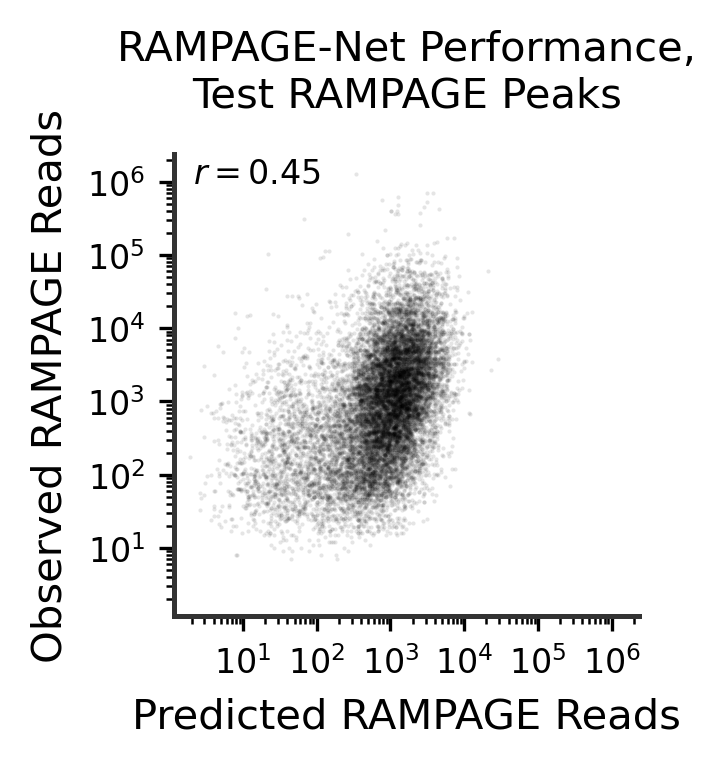

In [62]:
from matplotlib import ticker as mticker

def plot_pred_vs_true_cage_counts(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(2,2), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.1, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)
    plt.xticks([10, 100, 1000, 10000, 100000, 1000000])
    plt.yticks([10, 100, 1000, 10000, 100000, 1000000])

    plt.xlabel("Predicted " + cage_or_rampage.upper() + " Reads", fontsize=10)
    plt.ylabel("Observed " + cage_or_rampage.upper() + " Reads", fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 1.8, max_lim * 0.4,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8)
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()


title = cage_or_rampage.upper() + "-Net Performance,\nTest " + cage_or_rampage.upper() + " Peaks"
    
plot_pred_vs_true_cage_counts(np.exp(pred_logcounts_test[cage_or_rampage]),
                              true_counts_cage_cagepeaks,
                              title = title,
                              save_path = figures_dir + "7_" + cage_or_rampage + "_obs_vs_preds.png")

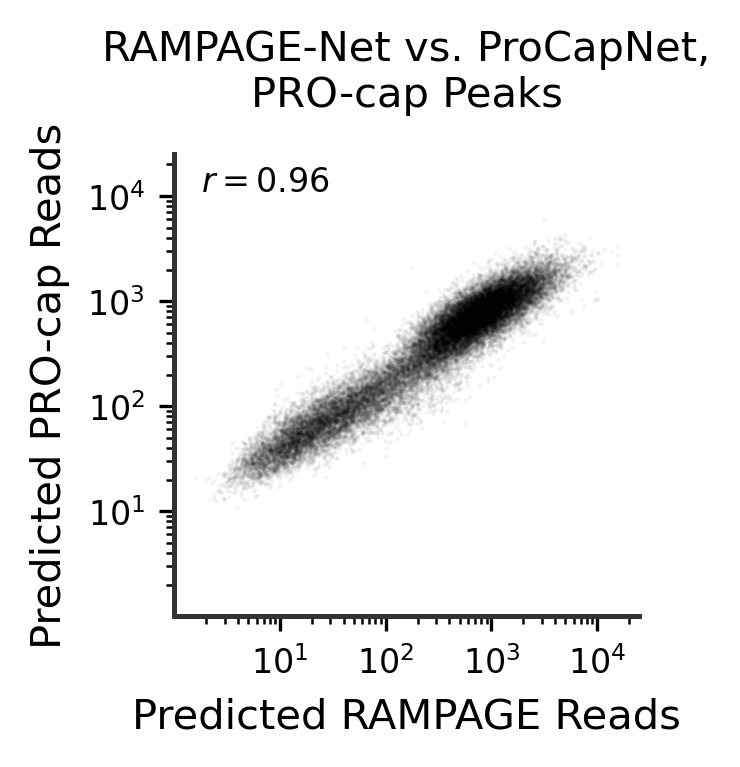

In [47]:
def plot_pred_vs_pred_counts(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(2,2), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.05, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)
    plt.xticks([10,100,1000,10000])
    plt.yticks([10,100,1000,10000])

    plt.xlabel("Predicted " + cage_or_rampage.upper() + " Reads", fontsize=10)
    plt.ylabel("Predicted PRO-cap Reads", fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 1.8, max_lim * 0.45,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8)
    
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()

    
title = cage_or_rampage.upper() + "-Net vs. ProCapNet,\nPRO-cap Peaks"

plot_pred_vs_pred_counts(np.exp(pred_logcounts_cage), np.exp(pred_logcounts_procap),
                         title = title,
                         save_path = figures_dir + "7_" + cage_or_rampage + "_vs_procap_preds.png")

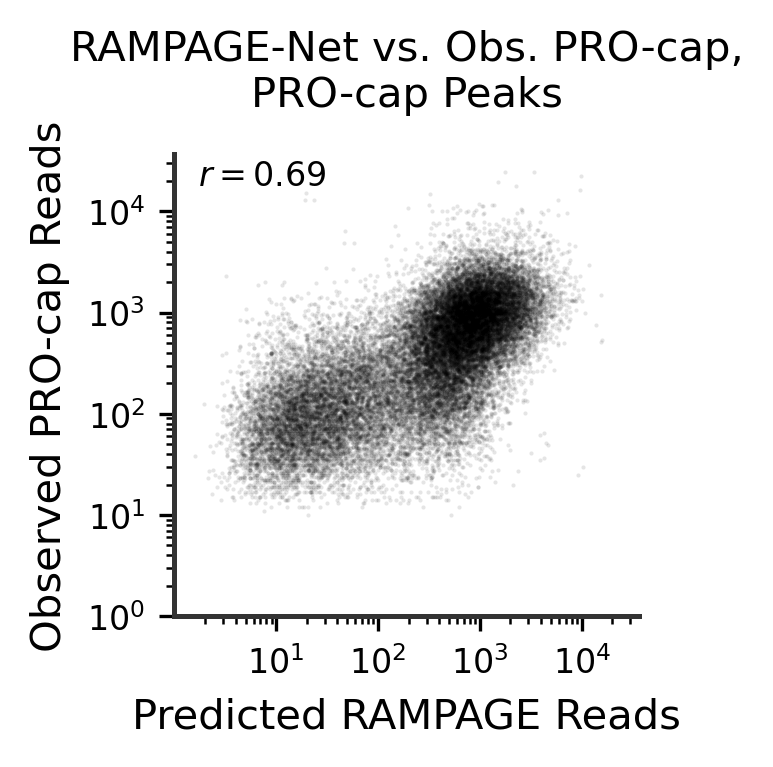

In [48]:
def plot_pred_cage_vs_true_procap(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(2,2), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.1, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.xlabel("Predicted " + cage_or_rampage.upper() + " Reads", fontsize=10)
    plt.ylabel("Observed PRO-cap Reads", fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 1.7, max_lim * 0.5,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8) 
    
    plt.xticks([10, 100, 1000, 10000])
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()


plot_pred_cage_vs_true_procap(np.exp(pred_logcounts_cage), true_counts_procap,
                              title = cage_or_rampage.upper() + "-Net vs. Obs. PRO-cap,\nPRO-cap Peaks",
                              save_path = figures_dir + "7_" + cage_or_rampage + "_preds_vs_obs_procap.png")

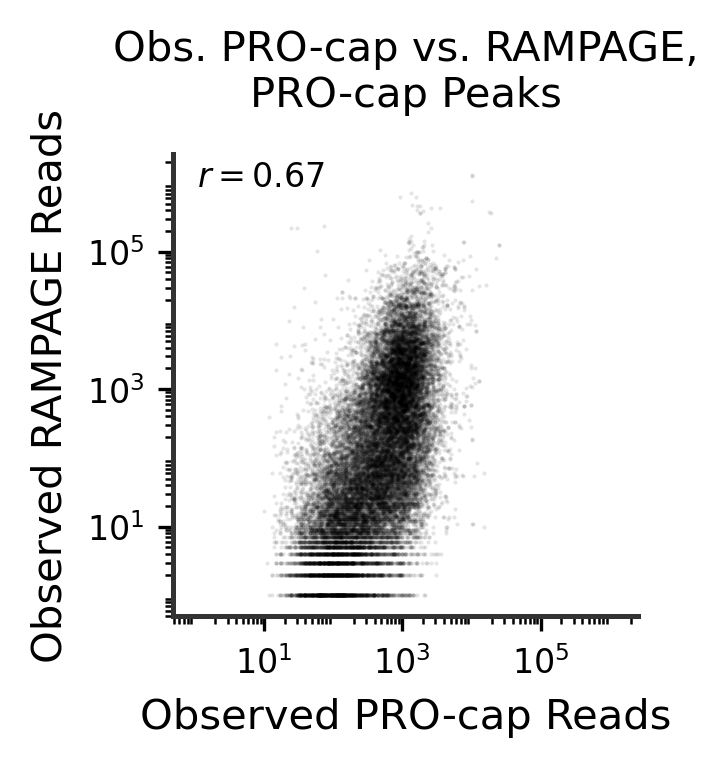

In [49]:
def plot_true_cage_vs_true_procap(pred_counts, true_counts,
                             title = None, save_path = None):

    pred_counts = pred_counts.squeeze().flatten()
    true_counts = true_counts.squeeze().flatten()
    
    assert pred_counts.shape == true_counts.shape, (pred_counts.shape, true_counts.shape)
    
    pearson_r = np.corrcoef(np.log1p(pred_counts),
                            np.log1p(true_counts))[0,1]

    plt.figure(figsize=(2,2), dpi=300)

    plt.scatter(pred_counts, true_counts,
                alpha = 0.1, s = 1, color="k", linewidths=0)

    plt.semilogy()
    plt.semilogx()

    max_lim = max(plt.gca().get_xlim()[1], plt.gca().get_ylim()[1])
    min_lim = min(plt.gca().get_xlim()[0], plt.gca().get_ylim()[0])
    plt.xlim(min_lim, max_lim)
    plt.ylim(min_lim, max_lim)

    plt.xlabel("Observed PRO-cap Reads", fontsize=10)
    plt.ylabel("Observed " + cage_or_rampage.upper() + " Reads", fontsize=10)

    if pearson_r is not None:
        plt.text(min_lim * 2.2, max_lim * 0.35,
                 r'$r = %0.2f$' % pearson_r,
                 fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params("both", labelsize=8) 
    
    #plt.xticks([10, 100, 1000, 10000])
    ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

    if title is not None:
        plt.title(title, fontsize=10, y=1.05)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()


plot_true_cage_vs_true_procap(true_counts_procap, true_counts_cage,
                         title = "Obs. PRO-cap vs. " + cage_or_rampage.upper() + ",\nPRO-cap Peaks",
                              save_path = figures_dir + "7_" + cage_or_rampage + "_vs_procap_obs.png")

In [157]:
import pyBigWig
from data_loading import read_fasta_fast, one_hot_encode

def load_sequence_at_locus(chrom, start, end, genome_path):
    genome = read_fasta_fast(genome_path, include_chroms = [chrom])
    seq = genome[chrom][start:end]
    onehot_seq = one_hot_encode(seq).T
    return seq, onehot_seq


def load_observed_profile_at_locus(chrom, start, end, plus_bw_path, minus_bw_path):
    with pyBigWig.open(plus_bw_path, "r") as plus_bw:
        plus_sig = plus_bw.values(chrom, start, end, numpy=True)
    plus_sig = np.nan_to_num(plus_sig)

    with pyBigWig.open(minus_bw_path, "r") as minus_bw:
        minus_sig = minus_bw.values(chrom, start, end, numpy=True)
    minus_sig = np.nan_to_num(minus_sig)

    signal = np.array([plus_sig, minus_sig])
    return signal


def get_locus_data(chrom, start, end, configs):
    mid = (start + end) // 2
    seq_start = mid - in_window // 2
    seq_end = seq_start + in_window
    seq, onehot_seq = load_sequence_at_locus(chrom, seq_start, seq_end, genome_path)
    
    prof_start = mid - out_window // 2
    prof_end = prof_start + out_window
    
    profs = dict()
    for expt in configs.keys():
        profs[expt] = load_observed_profile_at_locus(chrom, prof_start, prof_end,
                                                     plus_bw_paths[expt], minus_bw_paths[expt])
    
    return seq, onehot_seq, profs

# HBE1 promoter: chr11:5269856-5270154
# just kidding. what about chr7:90346468-90346849
# orrrrr MALAT1 promoter, chr11:65498838-65499227
chrom, start, end = ["chr11", 65498838, 65499227]

ex_seq, ex_onehot_seq, ex_profs = get_locus_data(chrom, start, end, configs)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.73it/s]


In [163]:
import torch

def load_model(config):
    model = torch.load(config.model_save_path)
    model.eval()
    model = model.cuda()
    return model

In [168]:
sys.path.append("../3_eval_models")
from eval_utils import model_predict_with_rc

def predict_merge_across_folds(onehot_seq, configs):
    pred_profs_across_folds = []
    pred_logcounts_across_folds = []
    
    onehot_seq = torch.tensor(onehot_seq, dtype=torch.float32)[None,...]
    
    for config in configs:
        print(config.timestamp)
        model = load_model(config)
        with torch.no_grad():
            pred_profs, pred_logcounts = model_predict_with_rc(model, onehot_seq)

        pred_prof = np.exp(pred_profs.squeeze())
        pred_profs_across_folds.append(pred_prof)
        pred_logcounts_across_folds.append(pred_logcounts)
        
    merged_pred_prof = np.array(pred_profs_across_folds).mean(axis=0)
    merged_pred_logcounts = np.array(pred_logcounts_across_folds).mean(axis=0)
    
    scaled_pred_prof = merged_pred_prof * np.exp(merged_pred_logcounts)
    return scaled_pred_prof

ex_pred_profs = dict()
ex_pred_profs[cage_or_rampage] = predict_merge_across_folds(ex_onehot_seq, fold_configs_cage)
ex_pred_profs["procap"] = predict_merge_across_folds(ex_onehot_seq, fold_configs_procap)

2023-09-13_21-57-36


/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../3_eval_models/eval_utils.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  onehot_seqs = torch.tensor(onehot_seqs, dtype=torch.float32).cuda()


2023-09-13_23-37-50
2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16
2023-05-29_15-51-40
2023-05-29_15-58-41
2023-05-29_15-59-09
2023-05-30_01-40-06
2023-05-29_23-21-23
2023-05-29_23-23-45
2023-05-29_23-24-11


In [166]:
sys.path.append('../4_interpret_models')

from deepshap_utils import get_attributions
from captum.attr import DeepLiftShap
from deepshap_utils import ProfileModelWrapper, CountsModelWrapper
from dinuc_shuffle import dinuc_shuffle


def deepshap(seq, model):
    prof_shap_explainer = DeepLiftShap(ProfileModelWrapper(model))
    count_shap_explainer = DeepLiftShap(CountsModelWrapper(model))
    
    if len(seq.shape) < 3:
        seq = seq[None,...]

    ref_seqs = dinuc_shuffle(seq[0], 25).float().cuda()
    prof_attrs = prof_shap_explainer.attribute(seq.cuda(), ref_seqs).cpu()
    prof_attrs = prof_attrs * seq
    
    count_attrs = count_shap_explainer.attribute(seq.cuda(), ref_seqs).cpu()
    count_attrs = count_attrs * seq
    
    return prof_attrs.squeeze().detach().numpy(), count_attrs.squeeze().detach().numpy()


def deepshap_merge_across_folds(onehot_seq, configs):
    prof_deepshap_across_folds = []
    count_deepshap_across_folds = []
    
    onehot_seq_t = torch.tensor(onehot_seq).float()[None, ...]
    
    for config in configs:
        model = load_model(config)
        prof_attrs, count_attrs = get_attributions(onehot_seq_t, model, is_stranded=False)
        prof_deepshap_across_folds.append(prof_attrs[0] * onehot_seq)
        count_deepshap_across_folds.append(count_attrs[0] * onehot_seq)

    merged_prof_deepshap = np.array(prof_deepshap_across_folds).mean(axis=0)
    merged_count_deepshap = np.array(count_deepshap_across_folds).mean(axis=0)
    return merged_prof_deepshap, merged_count_deepshap


prof_attrs = dict()
count_attrs = dict()

prof_attrs[cage_or_rampage], count_attrs[cage_or_rampage] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                                        fold_configs_cage)
prof_attrs["procap"], count_attrs["procap"] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                          fold_configs_procap)


Using scientific notation?


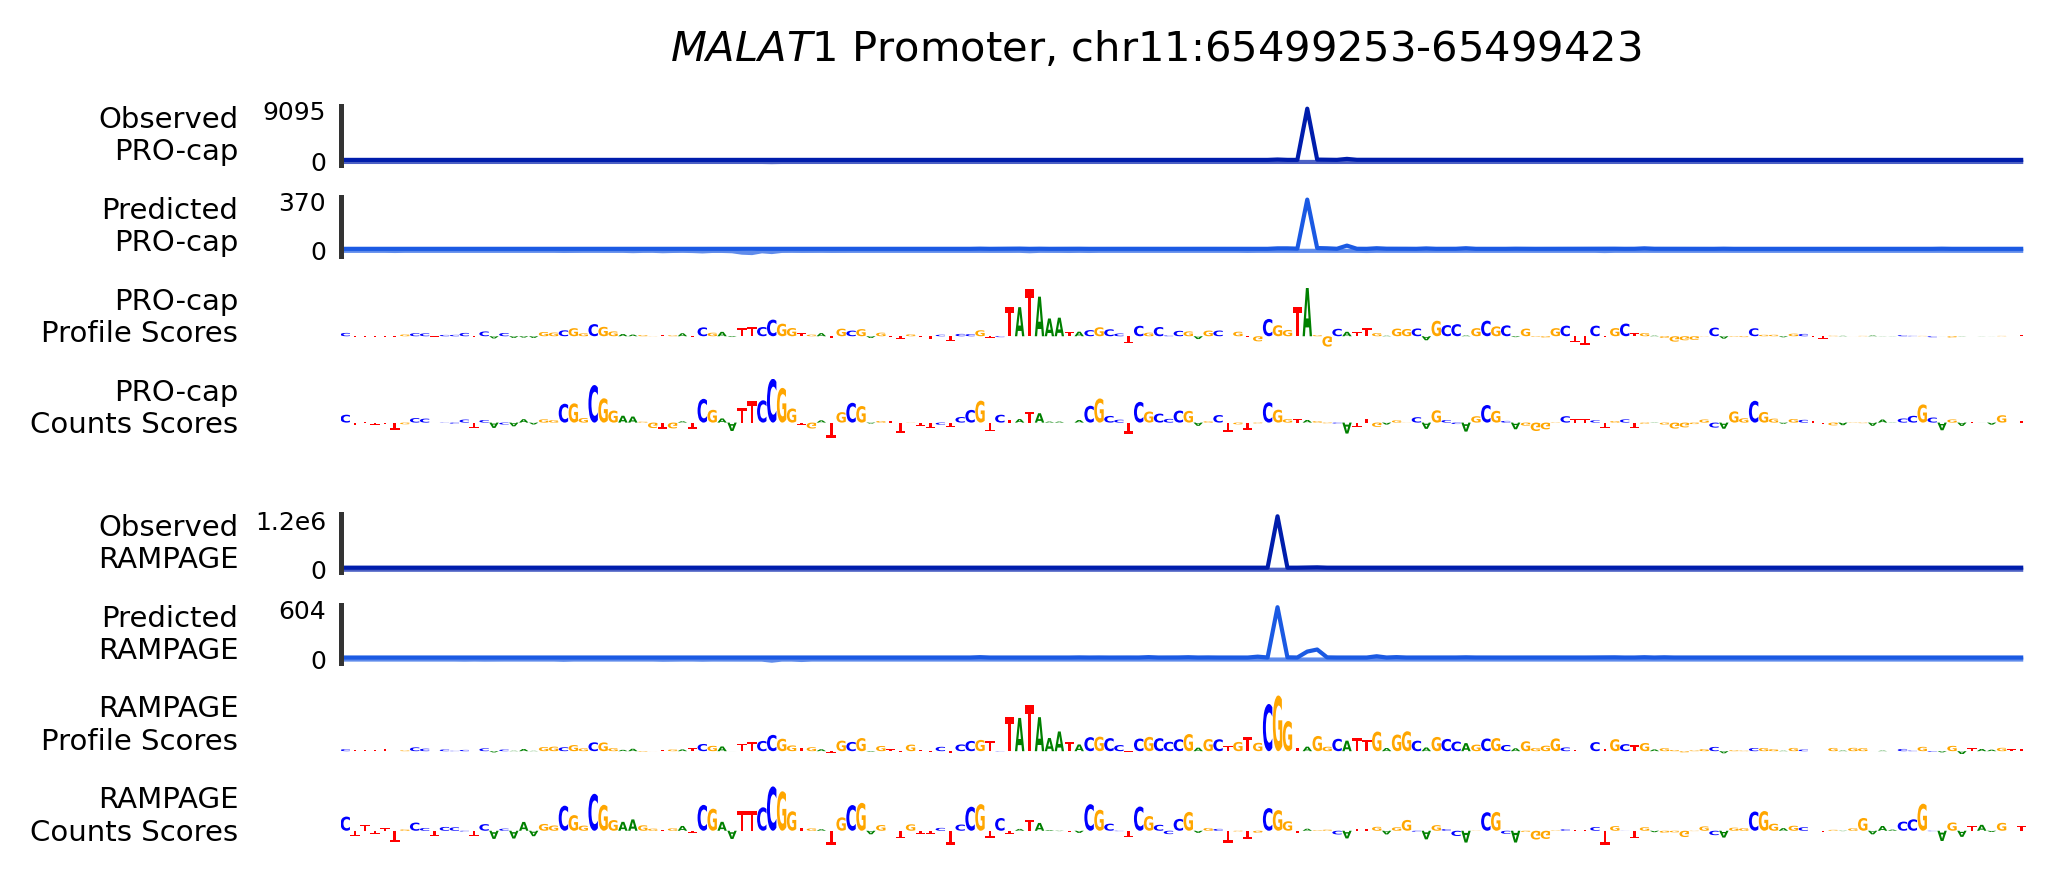

In [169]:
from other_motif_utils import plot_motif_on_ax
from matplotlib.patches import Rectangle


def slice_to_prof_len(attrs, prof_len = out_window):
    assert attrs.shape[-1] >= prof_len, attrs.shape
    mid = attrs.shape[-1] / 2
    prof_start = int(mid - prof_len / 2)
    prof_end = int(mid + prof_len / 2)
    return attrs[..., prof_start : prof_end ]


def plot_prof_on_ax(profile, ax, zoom_start, zoom_end,
                    color = "#001DAC", alphas = [1, 0.7],
                    linewidth=1, x_axis_buffer=0):
    
    x_range = np.arange(zoom_start, zoom_end) + 0.5
    offset = np.max(np.abs(profile[:, zoom_start:zoom_end])) * 0.02
    ax.plot(x_range, profile[0, zoom_start:zoom_end] + offset,
            alpha = alphas[0], c = color, linewidth=linewidth)
    ax.plot(x_range, -1 * profile[1, zoom_start:zoom_end] - offset,
            alpha = alphas[1], c = color, linewidth=linewidth)

    ax.set_xlim(zoom_start - x_axis_buffer, zoom_end + x_axis_buffer)
    
    
def get_prof_plot_lims(profs, zoom_start, zoom_end):
    neg_max_so_far = 0
    max_so_far = 0
    for prof in profs:
        prof = prof.squeeze()
        max_so_far = max(max_so_far, np.max(prof[0, zoom_start:zoom_end]))
        neg_max_so_far = max(neg_max_so_far, np.max(prof[1, zoom_start:zoom_end]))
    return -1 * neg_max_so_far, max_so_far 

def get_attr_plot_lims(attrs, zoom_start, zoom_end):
    neg_max_so_far = 0
    max_so_far = 0
    for attr in attrs:
        attr = slice_to_prof_len(attr)
        max_so_far = max(max_so_far, np.max(attr[:, zoom_start:zoom_end]))
        neg_max_so_far = min(neg_max_so_far, np.min(attr[:, zoom_start:zoom_end]))
    return neg_max_so_far, max_so_far 


def plot_obs_preds_and_attrs_cage_procap(true_profs, pred_profs,
                                         prof_attrs, count_attrs,
                                         prof_len = out_window,
                                         title = None, save_path = None,
                                         zoom_midpoint = 520, zoom_width = 225,
                                         neg_strand = False):
    
    num_subplots = 8
    num_actual_subplots = 8 + 1 # ?
    height_ratios = [10] * 4 + [2] + [10] * 4 
    
    fig = plt.figure(figsize=(7.25, 0.4 * num_subplots), dpi=300)
    gs = fig.add_gridspec(num_actual_subplots, height_ratios = height_ratios, hspace=0.6)
    axes = gs.subplots()

    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
    zoom_start = min(max(zoom_midpoint - zoom_width//2, 0), prof_len - zoom_width)
    zoom_end = zoom_start + zoom_width
    
    if title is not None:
        fig.suptitle(title, y = 0.96, fontsize=10, horizontalalignment='center')
    
    prof_attr_min, prof_attr_max = get_attr_plot_lims(prof_attrs.values(),
                                            zoom_start, zoom_end)
    count_attr_min, count_attr_max = get_attr_plot_lims(count_attrs.values(),
                                            zoom_start, zoom_end)
    axis_fontsize = 7
    axis_labelpad = 4
    axis_index = 0
        
    if cage_or_rampage == "cage":
        expts_fancy_names = {"procap":"PRO-cap", "cage":"CAGE"}
    else:
        expts_fancy_names = {"procap":"PRO-cap", "rampage":"RAMPAGE"}
    
    for expt, expt_fancy_name in expts_fancy_names.items():
        plot_prof_on_ax(true_profs[expt].squeeze(), axes[axis_index], zoom_start, zoom_end,
                        color = "#001DAC")
        axes[axis_index].set_ylabel("Observed\n" + expt_fancy_name,
                                    fontsize = axis_fontsize, rotation=0, labelpad=axis_labelpad,
                                    ha='right', va="center")

        axis_index += 1

        plot_prof_on_ax(pred_profs[expt].squeeze(), axes[axis_index], zoom_start, zoom_end,
                        color = "#1B5AE3")

        axes[axis_index].set_ylabel("Predicted\n" + expt_fancy_name,
                                    fontsize = axis_fontsize, rotation=0, labelpad=axis_labelpad,
                                    ha='right', va="center")
        axis_index += 1

        prof_attr = slice_to_prof_len(prof_attrs[expt])[:, zoom_start : zoom_end].T
        plot_motif_on_ax(prof_attr, axes[axis_index])

        axes[axis_index].set_ylabel(expt_fancy_name + "\nProfile Scores",
                                    fontsize = axis_fontsize, rotation=0,
                                    labelpad=axis_labelpad, ha='right', va="center")
        axis_index += 1

        count_attr = slice_to_prof_len(count_attrs[expt])[:, zoom_start : zoom_end].T
        plot_motif_on_ax(count_attr, axes[axis_index])

        axes[axis_index].set_ylabel(expt_fancy_name + "\nCounts Scores",
                                    fontsize = axis_fontsize, rotation=0,
                                    labelpad=axis_labelpad, ha='right', va="center")
        axis_index += 2

    # aesthetics below
    
    axis_index -= 2  # fix off-by-one error from loop above (no spacing subplot after last set of subplots)
    curr_xticks = axes[axis_index].get_xticks()
    axes[axis_index].set_xticks(curr_xticks, [int(tick_pos + zoom_start) for tick_pos in curr_xticks])
    
    for ax_i, ax in enumerate(axes):
        ax.tick_params(left=False, length=0, labelsize=6)
        
        if height_ratios[ax_i] == 2:  # is this one of the spacing subplots?
            ax.spines["left"].set_visible(False)
            ax.set_yticks([])
        else:
            ax.spines["left"].set_linewidth(1.2)
            ax.spines["left"].set_color("#333333")
            
            if ax_i == 0:
                plot_max = true_profs["procap"].max()
            if ax_i == 5:
                plot_max = true_profs[cage_or_rampage].max()
            if ax_i == 1:
                plot_max = pred_profs["procap"].max()
            if ax_i == 6:
                plot_max = pred_profs[cage_or_rampage].max()
            
            if ax_i in [0,1,5,6]:
                
                if plot_max > 10000:
                    print("Using scientific notation?")
                    ax.yaxis.get_offset_text().set_fontsize(6)
                    
                    plot_max_str = str(plot_max)[0] + "." + str(plot_max)[1] + "e" + str(len(str(int(plot_max))) - 1)

                    if not neg_strand:
                        ax.set_yticks([0, float(plot_max_str)], ["0", plot_max_str])
                    else:
                        ax.set_yticks([-1 * float(plot_max_str), 0], [plot_max_str, "0"])
                    
                else:
                    if not neg_strand:
                        ax.set_yticks([0, int(plot_max)])
                    else:
                        ax.set_yticks([-1 * int(plot_max), 0], [int(plot_max), 0])

        ax.spines[["top", "right"]].set_visible(False)
        
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
    
    fig.align_ylabels()
    
    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)

    plt.show()


def make_title(prefix, chrom, start, end, zoom_midpoint = 500, zoom_width = 500):
    zoom_start = min(max(zoom_midpoint - zoom_width//2, 0), out_window - zoom_width)
    zoom_end = zoom_start + zoom_width
    title = prefix + chrom + ":" + str(start + zoom_start) + "-" + str(start + zoom_end)
    return title

title = make_title(r'$\it{MALAT1}$ Promoter, ', chrom, start, end, zoom_midpoint = 500, zoom_width = 170)

plot_obs_preds_and_attrs_cage_procap(ex_profs, ex_pred_profs,
                                     prof_attrs, count_attrs,
                                     title = title,
                                     zoom_midpoint = 500, zoom_width = 170,
                                     save_path = figures_dir + "7_example_malat1_" + cage_or_rampage + ".png")


Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]
/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../3_eval_models/eval_utils.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  onehot_seqs = torch.tensor(onehot_seqs, dtype=torch.float32).cuda()


2023-09-13_21-57-36
2023-09-13_23-37-50
2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16
2023-05-29_15-51-40
2023-05-29_15-58-41
2023-05-29_15-59-09
2023-05-30_01-40-06
2023-05-29_23-21-23
2023-05-29_23-23-45
2023-05-29_23-24-11


  0%|                                                                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../4_interpret_models/deepshap_utils.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(sequences[i : i + 1]).float()
/users/kcochran/miniconda3/envs/procap_A100/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████

Using scientific notation?


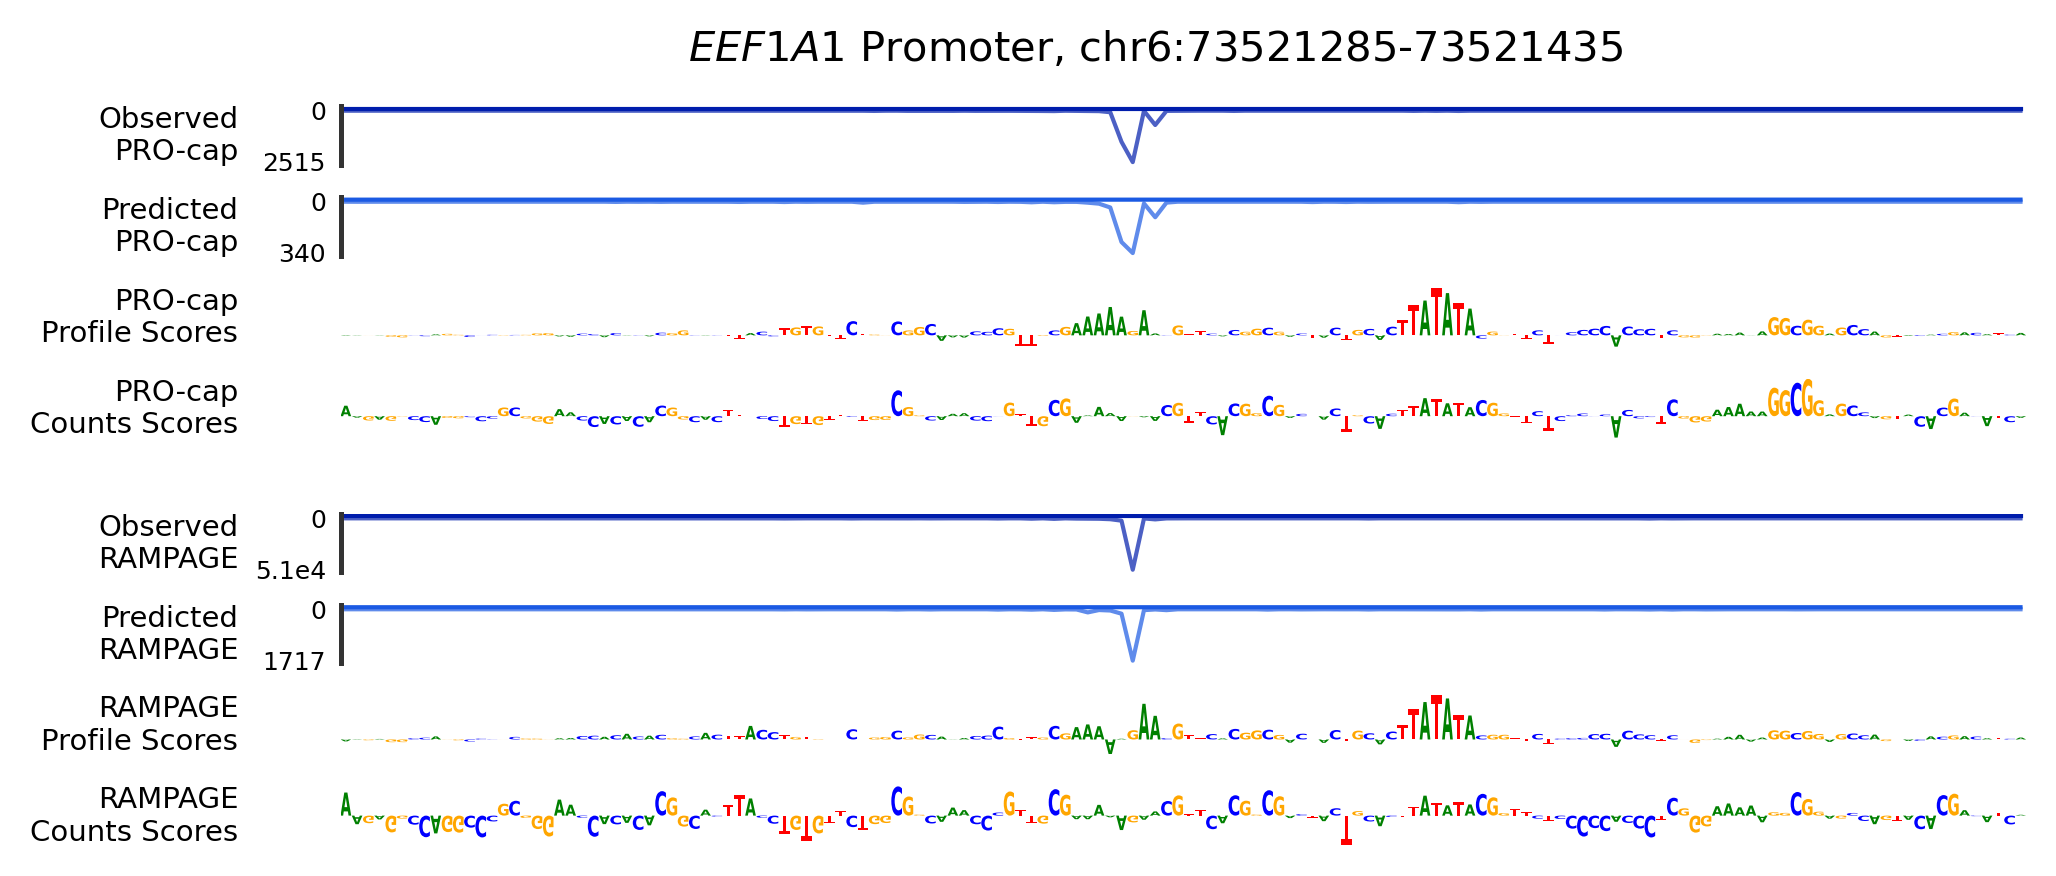

In [170]:
def make_plot_for_site2():
    chrom, start, end = ["chr6", 73520895, 73521247]

    ex_seq, ex_onehot_seq, ex_profs = get_locus_data(chrom, start, end, configs)

    ex_pred_profs = dict()
    ex_pred_profs[cage_or_rampage] = predict_merge_across_folds(ex_onehot_seq, fold_configs_cage)
    ex_pred_profs["procap"] = predict_merge_across_folds(ex_onehot_seq, fold_configs_procap)
    
    prof_attrs = dict()
    count_attrs = dict()

    prof_attrs[cage_or_rampage], count_attrs[cage_or_rampage] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                                        fold_configs_cage)
    prof_attrs["procap"], count_attrs["procap"] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                          fold_configs_procap)

    title = make_title(r'$\it{EEF1A1}$ Promoter, ', chrom, start, end, zoom_midpoint = 465, zoom_width = 150)

    plot_obs_preds_and_attrs_cage_procap(ex_profs, ex_pred_profs,
                                         prof_attrs, count_attrs,
                                         title = title,
                                         zoom_midpoint = 465, zoom_width = 150,
                                         save_path = figures_dir + "7_example2_ef1a_" + cage_or_rampage + ".png",
                                         neg_strand = True)
    
make_plot_for_site2()

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.16it/s]
/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../3_eval_models/eval_utils.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  onehot_seqs = torch.tensor(onehot_seqs, dtype=torch.float32).cuda()


2023-09-13_21-57-36
2023-09-13_23-37-50
2023-09-14_01-07-10
2023-09-14_02-28-40
2023-09-14_03-25-49
2023-09-14_04-44-39
2023-09-14_05-56-16
2023-05-29_15-51-40
2023-05-29_15-58-41
2023-05-29_15-59-09
2023-05-30_01-40-06
2023-05-29_23-21-23
2023-05-29_23-23-45
2023-05-29_23-24-11


  0%|                                                                                                                                                                                                                                   | 0/1 [00:00<?, ?it/s]/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../4_interpret_models/deepshap_utils.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(sequences[i : i + 1]).float()
/users/kcochran/miniconda3/envs/procap_A100/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████

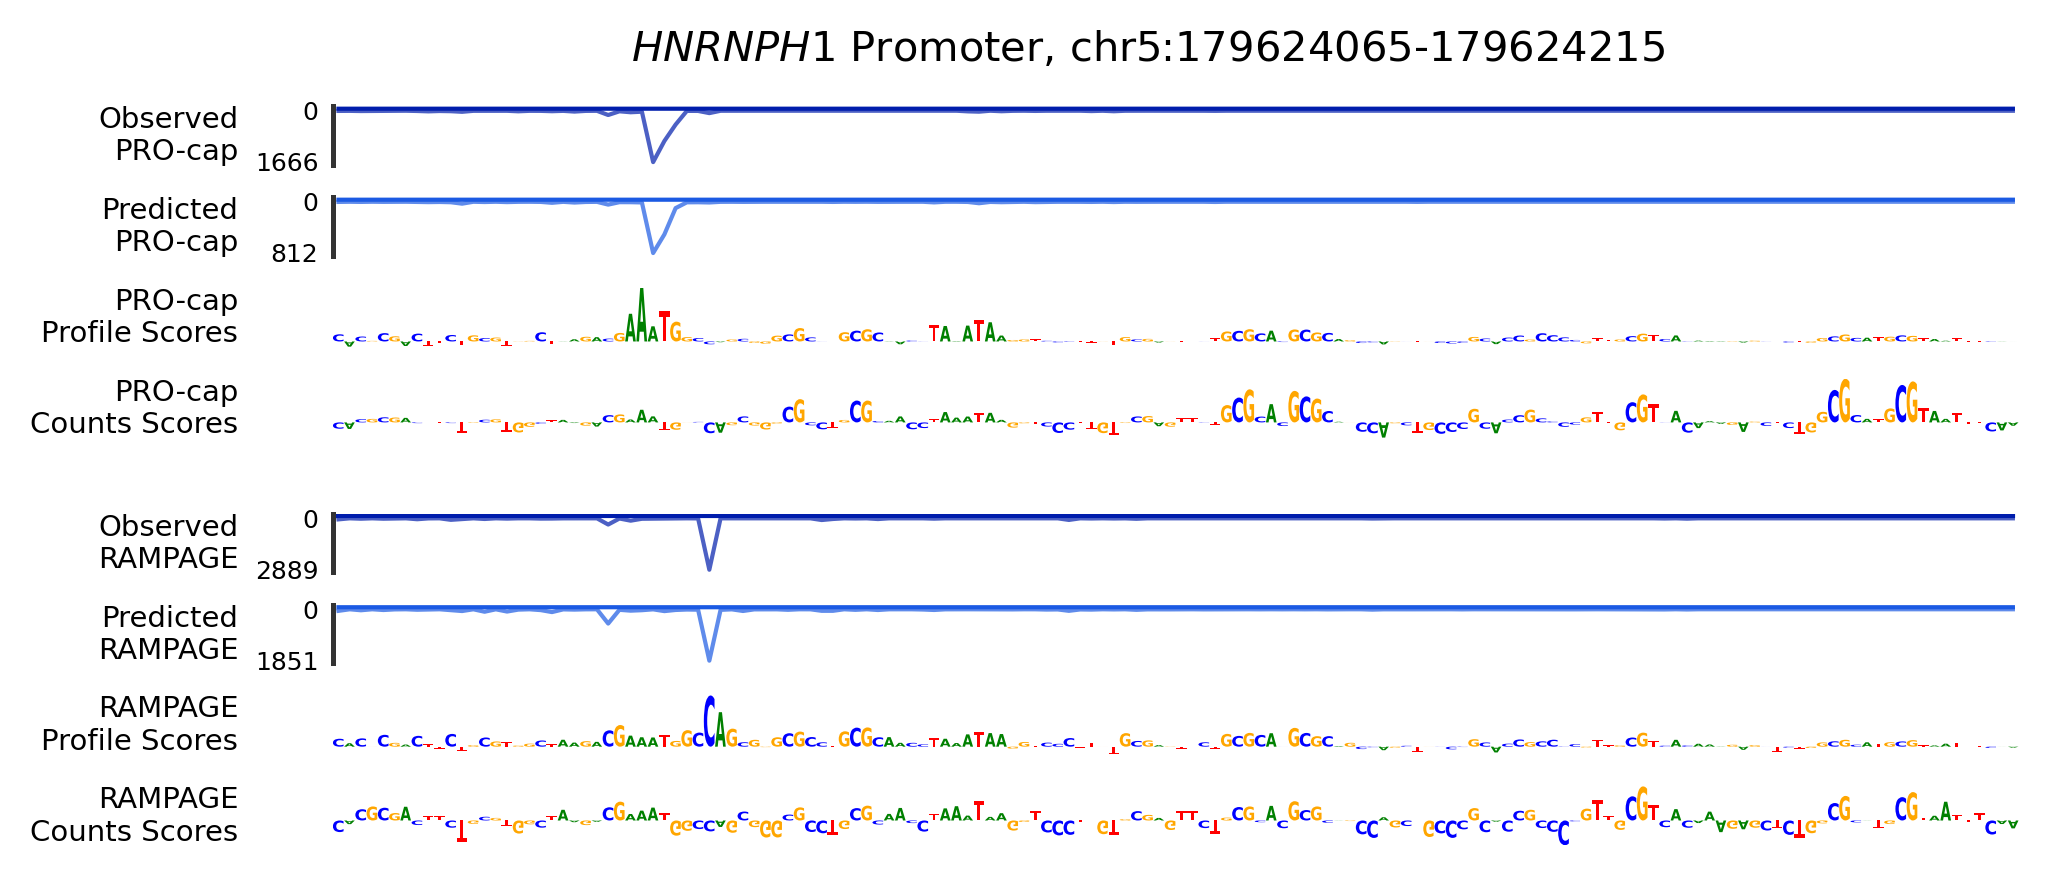

In [171]:
# HBE1 promoter: chr11:5269856-5270154
# just kidding. what about chr7:90346468-90346849
# chr5:179623647-179623788

def make_plot_for_site3():
    chrom, start, end = ["chr5", 179623640, 179623790]

    ex_seq, ex_onehot_seq, ex_profs = get_locus_data(chrom, start, end, configs)

    ex_pred_profs = dict()
    ex_pred_profs[cage_or_rampage] = predict_merge_across_folds(ex_onehot_seq, fold_configs_cage)
    ex_pred_profs["procap"] = predict_merge_across_folds(ex_onehot_seq, fold_configs_procap)
    
    prof_attrs = dict()
    count_attrs = dict()

    prof_attrs[cage_or_rampage], count_attrs[cage_or_rampage] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                                        fold_configs_cage)
    prof_attrs["procap"], count_attrs["procap"] = deepshap_merge_across_folds(ex_onehot_seq,
                                                                          fold_configs_procap)

    title = make_title(r'$\it{HNRNPH1}$ Promoter, ', chrom, start, end, zoom_midpoint = 500, zoom_width = 150)

    plot_obs_preds_and_attrs_cage_procap(ex_profs, ex_pred_profs,
                                         prof_attrs, count_attrs,
                                         title = title,
                                         zoom_midpoint = 500, zoom_width = 150,
                                         save_path = figures_dir + "7_example3_hnrnph1_" + cage_or_rampage + ".png",
                                         neg_strand = True)
    
make_plot_for_site3()

In [ ]:
# need to report JSDs in text

In [50]:
def get_pseudorep_filepaths(config, pseudorep, pos_or_neg = "pos"):
    data_dir = config.data_dir
    return os.path.join(data_dir, "pseudorep" + str(pseudorep) + "." + pos_or_neg + ".bigWig")

In [ ]:
# will be using each experiments respective peak set for these calculations

In [63]:
# needs to match 1_process_data/_split_peaks_train_val_test.py

FOLDS = [["chr1", "chr4"],
         ["chr2", "chr13", "chr16"],
         ["chr5", "chr6", "chr20", "chr21"],
         ["chr7", "chr8", "chr9"],
         ["chr10", "chr11", "chr12"],
         ["chr3", "chr14", "chr15", "chr17"],
         ["chr18", "chr19", "chr22", "chrX", "chrY"]]


def get_fold_label(chrom):
    for fold_i, fold_chroms in enumerate(FOLDS):
            if chrom in fold_chroms:
                return fold_i
    return -1

def make_fold_labels(cell_type, model_type, data_type):
    merged_config = MergedFilesConfig(cell_type, model_type, data_type)
    all_coords = load_coords(merged_config.all_peak_path, in_window)
    
    fold_labels = [get_fold_label(coord[0]) for coord in all_coords]
    assert all([label > -1 for label in fold_labels]), fold_labels
    return fold_labels
        
fold_labels = dict()
fold_labels["procap"] = make_fold_labels(cell_type, model_type, "procap")
fold_labels[cage_or_rampage] = make_fold_labels(cell_type, model_type, cage_or_rampage)

In [65]:
from performance_metrics import compute_performance_metrics

def get_replicate_val_metrics(rep1_profs, rep2_profs):
    # need to make one of the replicates look like model predictions
    # (normalize to sum to 1, then take the log)
    # (need to add pseudocount to avoid log of 0 error)
    log_rep2_profs = np.log((rep2_profs + 1e-2) / (rep2_profs + 1e-2).sum(axis=(-1,-2), keepdims=True))

    metrics = compute_performance_metrics(rep1_profs.swapaxes(1,2)[:, None, :, :],
                                          log_rep2_profs.swapaxes(1,2)[:, None, :, :],
                                          rep1_profs.sum(axis=-1)[:, None, :],
                                          np.log1p(rep2_profs.sum(axis=-1))[:, None, :],
                                          smooth_true_profs=False,
                                          smooth_pred_profs=False)
    return metrics

rep_val_metrics = dict()
rep_val_metrics["procap"] = get_replicate_val_metrics(pr1_profs["procap"], pr2_profs["procap"])
rep_val_metrics[cage_or_rampage] = get_replicate_val_metrics(pr1_profs[cage_or_rampage], pr2_profs[cage_or_rampage])


/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../2_train_models/performance_metrics.py:52: RuntimeWarning: invalid value encountered in true_divide
  cross_ent = (-log_prob_pows_sum) / trials


In [73]:
true_profs_procap.shape, pred_logcounts_test["procap"].shape

((30534, 2, 1000), (30534, 1))

In [75]:
def get_nonsmooth_val_metrics(true_profs, log_pred_profs,
                              true_counts, pred_logcounts):
    
    metrics = compute_performance_metrics(true_profs.swapaxes(1,2)[:, None, :, :],
                                          log_pred_profs.swapaxes(1,2)[:, None, :, :],
                                          true_counts[:, None, :],
                                          np.concatenate((pred_logcounts[:, None, None],
                                                          pred_logcounts[:, None, None]), axis=-1),
                                          smooth_true_profs=False,
                                          smooth_pred_profs=False)
    return metrics

val_metrics = dict()
val_metrics["procap"] = get_nonsmooth_val_metrics(true_profs_procap,
                                                  log_pred_profs_test["procap"],
                                                  true_profs_procap.sum(axis=-1),
                                                  pred_logcounts_test["procap"].squeeze())

val_metrics[cage_or_rampage] = get_nonsmooth_val_metrics(true_profs_cage_cagepeaks,
                                                         log_pred_profs_test[cage_or_rampage],
                                                         true_profs_cage_cagepeaks.sum(axis=-1),
                                                         pred_logcounts_test[cage_or_rampage].squeeze())


In [76]:
def get_avg_baseline_val_metrics(true_profs, true_counts):
    # if you run this on models that are not strand-merged, update this function
    assert "strand_merged" in model_type
    
    avg_prof = true_profs.mean(axis=0)
    log_avg_prof = np.log(avg_prof / np.sum(avg_prof, axis=(-1,-2), keepdims=True))
    log_avg_prof_tiled = np.tile(log_avg_prof, (true_profs.shape[0], 1, 1))
    
    rand_pred_logcounts = np.ones_like(true_counts)

    metrics = compute_performance_metrics(true_profs.swapaxes(1,2)[:, None, :, :],
                                          log_avg_prof_tiled.swapaxes(1,2)[:, None, :, :],
                                          true_counts[:, None, :],
                                          rand_pred_logcounts[:, None, :],
                                          smooth_true_profs=False,
                                          smooth_pred_profs=False)
    return metrics

avgprof_val_metrics = dict()
avgprof_val_metrics["procap"] = get_avg_baseline_val_metrics(true_profs_procap,
                                                             true_profs_procap.sum(axis=-1))
avgprof_val_metrics[cage_or_rampage] = get_avg_baseline_val_metrics(true_profs_cage_cagepeaks,
                                                   true_profs_cage_cagepeaks.sum(axis=-1))

In [80]:
def get_norm_val_metrics(val_metrics, rep_val_metrics, rand_val_metrics,
                                   metrics = ["nll", "jsd", "profile_pearson"]):
    norm_val_metrics = dict()

    for metric in metrics:
        pred_vs_obs = val_metrics[metric]
        rep_baseline = rep_val_metrics[metric]
        rand_baseline = rand_val_metrics[metric]

        norm_metrics = (pred_vs_obs - rand_baseline) / (rep_baseline - rand_baseline)
        norm_metrics = np.clip(norm_metrics, 0, 1)
        norm_val_metrics[metric] = norm_metrics

    return norm_val_metrics

norm_val_metrics = dict()
norm_val_metrics["procap"] = get_norm_val_metrics(val_metrics["procap"],
                                                  rep_val_metrics["procap"],
                                                  avgprof_val_metrics["procap"])
norm_val_metrics[cage_or_rampage] = get_norm_val_metrics(val_metrics[cage_or_rampage],
                                                  rep_val_metrics[cage_or_rampage],
                                                  avgprof_val_metrics[cage_or_rampage])

In [81]:
def look_at_prof_metrics_over_folds(metrics, fold_labels, metric_name="jsd"):
    metrics_over_folds = []
    for fold in sorted(list(set(fold_labels))):
        in_fold = np.array([fold_label == fold for fold_label in fold_labels])
        
        metrics_fold = metrics[metric_name][in_fold]
        
        metrics_over_folds.append(np.median(metrics_fold))
        
    print("Genome-wide Test JSDs:")
    print(np.median(metrics[metric_name]))
    print("Average Within-Fold Test JSD:")
    print(np.mean(metrics_over_folds))
    print("Standard Deviation of JSD Across Folds:")
    print(np.std(metrics_over_folds))
    
look_at_prof_metrics_over_folds(val_metrics["procap"], fold_labels["procap"])

Genome-wide Test JSDs:
0.34058651328086853
Average Within-Fold Test JSD:
0.34043227561882566
Standard Deviation of JSD Across Folds:
0.004311348181388533


In [82]:
look_at_prof_metrics_over_folds(val_metrics[cage_or_rampage], fold_labels[cage_or_rampage])

Genome-wide Test JSDs:
0.4105875790119171
Average Within-Fold Test JSD:
0.41031355942998615
Standard Deviation of JSD Across Folds:
0.002851882915917731


In [83]:
look_at_prof_metrics_over_folds(norm_val_metrics["procap"], fold_labels["procap"])

Genome-wide Test JSDs:
0.7535074092302518
Average Within-Fold Test JSD:
0.7528651549443113
Standard Deviation of JSD Across Folds:
0.008758283595607317


In [84]:
look_at_prof_metrics_over_folds(norm_val_metrics[cage_or_rampage], fold_labels[cage_or_rampage])

Genome-wide Test JSDs:
0.45591152189192485
Average Within-Fold Test JSD:
0.4566577006585884
Standard Deviation of JSD Across Folds:
0.008189560070782134


In [12]:
sys.path.append('../4_interpret_models')
import torch
from deepshap_utils import ProfileModelWrapper, CountsModelWrapper, get_attributions

# different from the earlier function, this one does multiple sequences
def deepshap_batch_merge_across_folds(onehot_seqs, configs):
    prof_deepshap_across_folds = []
    count_deepshap_across_folds = []
    
    onehot_seqs_t = torch.tensor(onehot_seqs).float()
    
    for config in configs:
        model = load_model(config)
        prof_attrs, count_attrs = get_attributions(onehot_seqs_t, model, is_stranded=False)
        prof_deepshap_across_folds.append(prof_attrs * onehot_seqs)
        count_deepshap_across_folds.append(count_attrs * onehot_seqs)

    merged_prof_deepshap = np.array(prof_deepshap_across_folds).mean(axis=0)
    merged_count_deepshap = np.array(count_deepshap_across_folds).mean(axis=0)
    return merged_prof_deepshap, merged_count_deepshap


all_prof_attrs = dict()
all_count_attrs = dict()
all_prof_attrs["procap"], all_count_attrs["procap"] = deepshap_batch_merge_across_folds(onehot_seqs[:10],
                                                                          fold_configs_procap)

  0%|                                                                                                                                                                                                                                  | 0/10 [00:00<?, ?it/s]/mnt/lab_data2/kcochran/procapnet/src/figure_notebooks/../4_interpret_models/deepshap_utils.py:97: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(sequences[i : i + 1]).float()
/users/kcochran/miniconda3/envs/procap_A100/lib/python3.9/site-packages/captum/attr/_core/deep_lift.py:336: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████████

In [38]:
def load_all_procap_deepshap_scores(config):
    profile_deepshap_path = config.profile_onehot_scores_path
    counts_deepshap_path = config.counts_onehot_scores_path
    
    # because already onehot, flattening 4-axis
    profile_deepshap = np.load(profile_deepshap_path).sum(axis=1)
    counts_deepshap = np.load(counts_deepshap_path).sum(axis=1)
    
    return profile_deepshap, counts_deepshap

all_deepshap_prof_procap, all_deepshap_count_procap = load_all_procap_deepshap_scores(configs["procap"])

In [39]:
def load_all_cage_deepshap_scores(config):
    profile_deepshap_path = config.profile_onehot_scores_path.replace("all_", "all_procap_peaks_")
    counts_deepshap_path = config.counts_onehot_scores_path.replace("all_", "all_procap_peaks_")
    
    # because already onehot, flattening 4-axis
    profile_deepshap = np.load(profile_deepshap_path).sum(axis=1)
    counts_deepshap = np.load(counts_deepshap_path).sum(axis=1)
    
    return profile_deepshap, counts_deepshap

all_deepshap_prof_cage, all_deepshap_count_cage = load_all_cage_deepshap_scores(configs[cage_or_rampage])

In [106]:
# probably makes sense to focus on the deepshap scores within the peak region

all_deepshap_prof_procap = all_deepshap_prof_procap[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]
all_deepshap_count_procap = all_deepshap_count_procap[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]
all_deepshap_prof_cage = all_deepshap_prof_cage[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]
all_deepshap_count_cage = all_deepshap_count_cage[..., in_window//2 - out_window//2 : in_window//2 + out_window//2]


In [107]:
all_deepshap_prof_procap.shape, all_deepshap_prof_cage.shape

((30534, 1000), (30534, 1000))

In [108]:
from scipy.stats import spearmanr

def calc_deepshap_correlations(deepshaps1, deepshaps2):
    assert len(deepshaps1.shape) == 2, deepshaps1.shape 
    assert len(deepshaps2.shape) == 2, deepshaps2.shape
    assert deepshaps1.shape[0] == deepshaps2.shape[0], (deepshaps1.shape, deepshaps2.shape)
    assert deepshaps1[0].shape == deepshaps2[0].shape, (deepshaps1.shape, deepshaps2.shape)
    
    pearson_rs = [np.corrcoef(deepshaps1[i], deepshaps2[i])[0,1] for i in range(deepshaps1.shape[0])]
    spearman_rs = [spearmanr(deepshaps1[i], deepshaps2[i]).correlation for i in range(deepshaps1.shape[0])]
    
    return pearson_rs, spearman_rs

prof_deepshap_pearson_rs, prof_deepshap_spearman_rs = calc_deepshap_correlations(all_deepshap_prof_procap,
                                                                                 all_deepshap_prof_cage)
count_deepshap_pearson_rs, count_deepshap_spearman_rs = calc_deepshap_correlations(all_deepshap_count_procap,
                                                                                 all_deepshap_count_cage)

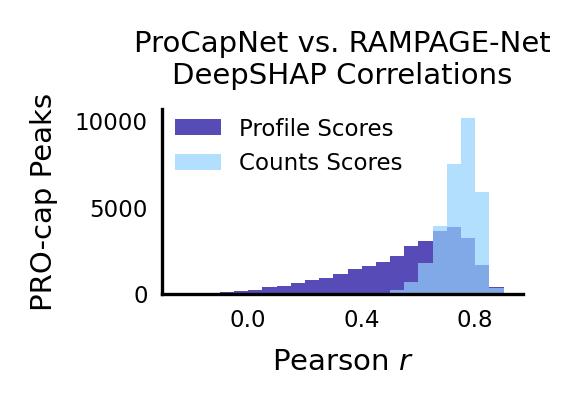

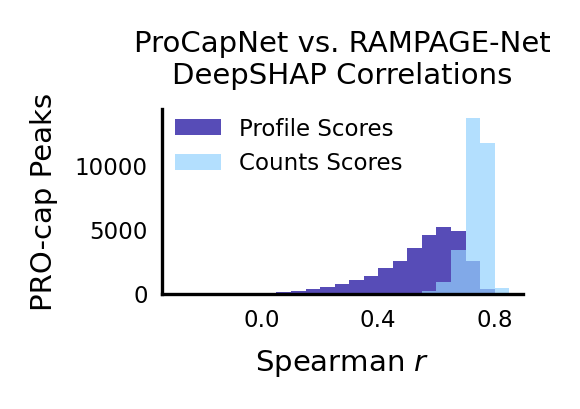

In [109]:
import matplotlib.pyplot as plt

def plot_correlations(prof_rs, count_rs, label = "Pearson $r$", save_path = None):
    plt.figure(figsize=(1.55,0.8), dpi=300)

    xmin = min(np.min(prof_rs), np.min(count_rs))
    xmax = max(np.max(prof_rs), np.max(count_rs))
    
    bins = np.arange(-1, 1, 0.05)
    
    plt.hist(prof_rs, bins=bins, label="Profile Scores", alpha=0.7, color="#100099")
    plt.hist(count_rs, bins=bins, label="Counts Scores", alpha=0.7, color="#93d2fe")

    plt.legend(frameon=False, fontsize=5.5, loc="center", bbox_to_anchor=(-0.15,0.3,1,1))
    
    title = "ProCapNet vs. " + cage_or_rampage.upper() + "-Net\nDeepSHAP Correlations"
    plt.title(title, fontsize=7)
    plt.xlabel(label, fontsize=7)
    plt.ylabel("PRO-cap Peaks", fontsize=7)
    
    plt.gca().spines[["top", "right"]].set_visible(False)
    plt.xticks([0, 0.4, 0.8])
    plt.gca().tick_params(length=0, labelsize=5.5)
    if xmin < 0:
        plt.xlim(1.05 * xmin, 1.05 * xmax)
    else:
        plt.xlim(0.95 * xmin, 1.05 * xmax)
        
    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)
        
    plt.show()

plot_correlations(prof_deepshap_pearson_rs, count_deepshap_pearson_rs,
                  label="Pearson $r$", save_path = figures_dir + "7_deepshap_pearson_rs.png")
    
plot_correlations(prof_deepshap_spearman_rs, count_deepshap_spearman_rs,
                  label="Spearman $r$")

In [113]:
np.mean(prof_deepshap_pearson_rs), np.mean(count_deepshap_pearson_rs)

(0.5635802823554279, 0.7452162947243464)

In [111]:
np.mean(prof_deepshap_spearman_rs), np.mean(count_deepshap_spearman_rs)

(0.5444390580217722, 0.7354694082475758)

In [115]:
# these files are made by 1.1_make_pseudoreps.sh
# which does:
# bedtools bamtobed -i "$bam" | awk 'BEGIN{OFS="\t"}{$4="N";$5="1000";print $0}' | grep -v "dm6" | gzip -nc > "$tagalign"
# (there was a drosophila spike-in for one expt)

procap_tagalign = configs["procap"].data_dir + "merged.tagAlign.bed.gz"
cage_tagalign = configs[cage_or_rampage].data_dir + "merged.tagAlign.bed.gz"

assert os.path.exists(procap_tagalign)
assert os.path.exists(cage_tagalign)

procap_readbed_pos = "procap.pos.reads.bed.gz"
procap_readbed_neg = "procap.neg.reads.bed.gz"
cage_readbed_pos = cage_or_rampage + ".pos.reads.bed.gz"
cage_readbed_neg = cage_or_rampage + ".neg.reads.bed.gz"

In [29]:
! zcat $procap_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "+" -g $chrom_sizes  -i stdin | gzip -nc > $procap_readbed_pos
! zcat $procap_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "-" -g $chrom_sizes  -i stdin | gzip -nc > $procap_readbed_neg
! zcat $cage_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "+" -g $chrom_sizes  -i stdin | gzip -nc > $cage_readbed_pos
! zcat $cage_tagalign | grep -e "chr[0-9XY]*	" | LC_COLLATE=C sort -k1,1 -k2,2n | bedtools genomecov -5 -bg -strand "-" -g $chrom_sizes  -i stdin | gzip -nc > $cage_readbed_neg


In [116]:
from data_loading import extract_sequences

def load_seqs_at_TSSs(pos_readbed, neg_readbed, seq_extend = 5):
    # this is implemented assuming that you've got bed windows of a single base
    
    # this function can't load odd seq lengths in, so just load an extra base and then truncate
    # technically, load 2 extra so 
    seqs_at_TSSs_pos = extract_sequences(genome_path, chrom_sizes, pos_readbed,
                                           in_window=seq_extend * 2 + 2, verbose=True)[:, :, 1:]
    seqs_at_TSSs_neg = extract_sequences(genome_path, chrom_sizes, neg_readbed,
                                           in_window=seq_extend * 2 + 2, verbose=True)[:, :, 1:]
    
    # RC the neg seqs so any stranded motifs are in the same orientation
    seqs_at_TSSs_neg = seqs_at_TSSs_neg[:, ::-1, ::-1]
    
    seqs_at_TSSs = np.concatenate((seqs_at_TSSs_pos, seqs_at_TSSs_neg), axis=0)
    return seqs_at_TSSs

seqs_at_procap = load_seqs_at_TSSs(procap_readbed_pos, procap_readbed_neg)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:08<00:00,  2.85it/s]
Loading Peaks: 3051531it [03:43, 13632.36it/s]


== In Extract Sequences ==
Peak filepath: procap.pos.reads.bed.gz
Sequence length: 12
Num. Examples: 3051531
Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.95it/s]
Loading Peaks: 3007372it [03:41, 13573.41it/s]


== In Extract Sequences ==
Peak filepath: procap.neg.reads.bed.gz
Sequence length: 12
Num. Examples: 3007372


In [117]:
seqs_at_cage = load_seqs_at_TSSs(cage_readbed_pos, cage_readbed_neg)

Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.78it/s]
Loading Peaks: 568066it [00:41, 13705.48it/s]


== In Extract Sequences ==
Peak filepath: rampage.pos.reads.bed.gz
Sequence length: 12
Num. Examples: 568066
Loading genome sequence from /mnt/lab_data2/kcochran/procapnet/genomes/hg38.withrDNA.fasta


Reading FASTA: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:06<00:00,  3.74it/s]
Loading Peaks: 556114it [00:40, 13695.92it/s]


== In Extract Sequences ==
Peak filepath: rampage.neg.reads.bed.gz
Sequence length: 12
Num. Examples: 556114


In [118]:
import gzip

# have to cast to float bc some numbers are in scientific notation

def read_last_bed_col(bed_path):
    if bed_path.endswith(".gz"):
        with gzip.open(bed_path) as f:
            last_col = [int(float(line.decode().rstrip().split()[-1])) for line in f]
    else:
        with open(bed_path) as f:
            last_col = [int(line.rstrip().split()[-1]) for line in f]
    return np.array(last_col)

counts_at_procap = np.concatenate([read_last_bed_col(f) for f in [procap_readbed_pos, procap_readbed_neg]])
counts_at_cage = np.concatenate([read_last_bed_col(f) for f in [cage_readbed_pos, cage_readbed_neg]])

In [119]:
def calc_ppm(seqs, counts):
    assert len(seqs.shape) == 3 and len(counts.shape) == 1, (seqs.shape, counts.shape)
    
    pfm_unnorm = np.sum(seqs * counts[..., None, None], axis=0)
    
    ppm = (pfm_unnorm / pfm_unnorm.sum(axis=0, keepdims=True)).T
    return ppm
    
ppm_at_procap = calc_ppm(seqs_at_procap, counts_at_procap)
ppm_at_cage = calc_ppm(seqs_at_cage, counts_at_cage)

In [120]:
from other_motif_utils import compute_per_position_ic

pwm_procap = ppm_at_procap * compute_per_position_ic(ppm_at_procap)[:, None]
pwm_cage = ppm_at_cage * compute_per_position_ic(ppm_at_cage)[:, None]

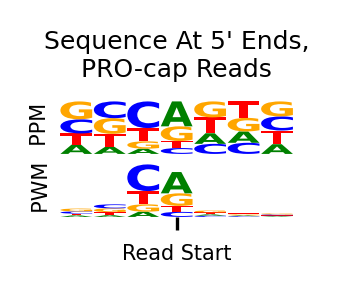

In [154]:
from other_motif_utils import plot_motif_on_ax

def plot_consensus_at_5prime_ends(ppm, pwm, title, save_path = None):
    fig, axes = plt.subplots(2, 1, figsize=(1,0.5), dpi=300)

    plot_motif_on_ax(ppm, axes[0])
    plot_motif_on_ax(pwm, axes[1])

    axes[0].set_ylabel("  PPM ", fontsize=5, labelpad=-1)
    axes[1].set_ylabel("  PWM ", fontsize=5, labelpad=-1)
    plt.title(title, fontsize=6, y=2.2)
    plt.xticks([3], ["Read Start"], fontsize=5)
    plt.gca().tick_params(length=3)

    if save_path is not None:
        plt.savefig(save_path, bbox_inches = 'tight', pad_inches = 0, dpi = 300)

    plt.show()
    

plot_consensus_at_5prime_ends(ppm_at_procap[2:-2], pwm_procap[2:-2],
                              "Sequence At 5' Ends,\nPRO-cap Reads",
                              save_path = figures_dir + "7_5prime_ends_procap.png")

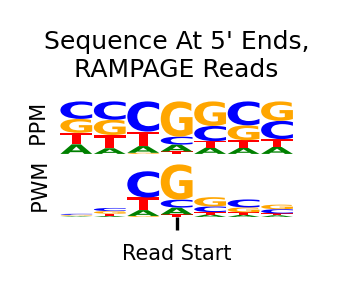

In [155]:
plot_consensus_at_5prime_ends(ppm_at_cage[2:-2], pwm_cage[2:-2],
                              "Sequence At 5' Ends,\n" + cage_or_rampage.upper() + " Reads",
                              save_path = figures_dir + "7_5prime_ends_" + cage_or_rampage + ".png")

In [38]:
from collections import defaultdict

def seqs_and_counts_to_dict(seqs, counts):
    assert len(seqs) == len(counts)
    
    seq_counts = defaultdict(lambda : 0)
    for seq, count in zip(seqs, counts):
        assert seq.shape[0] == 4, seq.shape
        seq_counts[tuple(seq.argmax(axis=0))] += count
        
    return seq_counts

seq_counts_at_procap = seqs_and_counts_to_dict(seqs_at_procap[..., 3:-3], counts_at_procap)
seq_counts_at_cage = seqs_and_counts_to_dict(seqs_at_cage[..., 3:-3], counts_at_cage)

In [39]:
seq_counts_at_procap

defaultdict(<function __main__.seqs_and_counts_to_dict.<locals>.<lambda>()>,
            {(3, 1, 0, 2, 3): 291757,
             (1, 0, 3, 3, 2): 21026,
             (0, 1, 0, 2, 0): 84630,
             (1, 1, 1, 0, 2): 34177,
             (1, 1, 0, 2, 1): 144629,
             (1, 0, 2, 1, 0): 7233,
             (0, 2, 1, 0, 1): 2626,
             (2, 1, 0, 1, 0): 74943,
             (0, 1, 0, 2, 3): 84951,
             (3, 1, 1, 3, 0): 15397,
             (0, 0, 0, 3, 2): 16592,
             (1, 3, 2, 0, 3): 29206,
             (1, 1, 3, 3, 0): 23424,
             (2, 1, 3, 3, 0): 8608,
             (2, 3, 2, 3, 2): 41619,
             (1, 3, 0, 2, 0): 46018,
             (0, 1, 0, 0, 0): 46214,
             (1, 3, 2, 2, 2): 64545,
             (3, 3, 2, 1, 3): 23215,
             (2, 3, 1, 0, 3): 3949,
             (1, 0, 3, 0, 0): 6066,
             (1, 0, 2, 3, 2): 23405,
             (2, 1, 0, 2, 2): 157859,
             (1, 2, 1, 0, 2): 3743,
             (2, 1, 0, 2, 0): 277951,


In [40]:
sorted([v for k,v in seq_counts_at_procap.items() if k[2] == 3], reverse=True)

[122140,
 106332,
 92958,
 71920,
 54323,
 46069,
 44653,
 42074,
 41313,
 40411,
 39645,
 39227,
 34063,
 29295,
 28881,
 26524,
 25759,
 25645,
 24346,
 24246,
 23825,
 23424,
 23296,
 23267,
 23003,
 21026,
 20072,
 20060,
 19628,
 19461,
 19433,
 19049,
 18262,
 17310,
 16555,
 16462,
 16435,
 16425,
 16323,
 15689,
 15624,
 15493,
 15463,
 15212,
 14819,
 14771,
 14475,
 14375,
 14360,
 14303,
 14005,
 13456,
 13377,
 13274,
 13074,
 12893,
 12698,
 12546,
 12318,
 11721,
 11644,
 11561,
 11123,
 10961,
 10821,
 10613,
 10610,
 10589,
 10581,
 10270,
 9815,
 9639,
 9363,
 9284,
 9270,
 9251,
 9205,
 9177,
 9105,
 9045,
 8940,
 8846,
 8840,
 8733,
 8608,
 8589,
 8569,
 8398,
 8358,
 8214,
 8197,
 8083,
 7845,
 7812,
 7675,
 7615,
 7520,
 7433,
 7394,
 7386,
 7369,
 7295,
 7150,
 6921,
 6827,
 6805,
 6584,
 6555,
 6539,
 6410,
 6242,
 6095,
 6087,
 6069,
 6066,
 5982,
 5825,
 5804,
 5703,
 5641,
 5631,
 5562,
 5418,
 5367,
 5342,
 5299,
 5186,
 5027,
 4992,
 4902,
 4849,
 4847,
 481

In [41]:
counttt = sum([c for tup, c in seq_counts_at_procap.items() if tup[2] == 0])
total = sum([c for tup, c in seq_counts_at_procap.items()])
counttt, total, counttt / total

(8897818, 18744613, 0.47468667397934544)

In [42]:
counttt = sum([c for tup, c in seq_counts_at_procap.items() if tup[2] == 3])
total = sum([c for tup, c in seq_counts_at_procap.items()])
counttt, total, counttt / total

(2509066, 18744613, 0.13385531085651114)

In [44]:
counttt = sum([c for tup, c in seq_counts_at_cage.items() if tup[2] == 0])
total = sum([c for tup, c in seq_counts_at_cage.items()])
counttt, total, counttt / total

(8685376, 66128713, 0.13134046628126575)

In [45]:
len(seq_counts_at_procap.keys())

1024

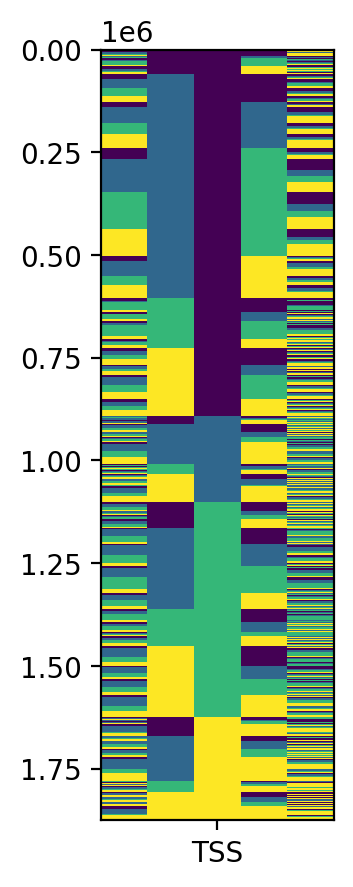

In [46]:
def heatmap(seq_counts_dict):
    weighted_seq_list = []
    
    for seq, count in seq_counts_dict.items():
        weighted_seq_list.extend([seq] * (count // 10))
        
    to_plot = np.array(sorted(weighted_seq_list,
                              key = lambda row : (row[2], row[1], row[3], row[0], row[4])))
    
    plt.figure(figsize=(1.5,5), dpi=200)
    plt.imshow(to_plot, aspect="auto", interpolation="none")
    plt.xticks([2], ["TSS"])
    plt.show()
    
heatmap(seq_counts_at_procap)

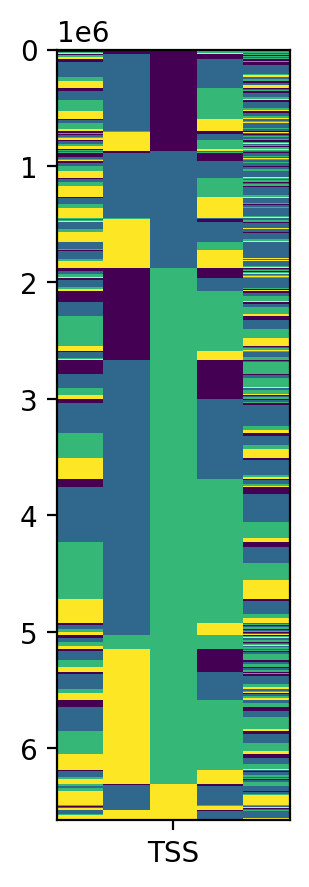

In [47]:
heatmap(seq_counts_at_cage)

In [50]:
from load_annotations_utils import load_coords_with_summits

def load_coords(cell_type, model_type, data_type):
    config = MergedFilesConfig(cell_type, model_type, data_type)
    return load_coords_with_summits(config.all_peak_path,
                                    in_window)

coords = load_coords(cell_type, model_type, "procap")

In [52]:
from load_annotations_utils import find_peak_overlap_labels, get_ccre_bed

def load_ccre_annots(cell_type, coords):
    return find_peak_overlap_labels(coords,
                        get_ccre_bed(cell_type, configs["procap"].proj_dir),
                                    in_window, out_window) 

ccre_annots = load_ccre_annots(cell_type, coords)

In [53]:
ccre_annots["PLS_no_pELS"] = ccre_annots["PLS"] * (~ ccre_annots["pELS"])
ccre_annots["PLS_with_pELS"] = ccre_annots["PLS"] * ccre_annots["pELS"]

In [54]:
from common_functions import get_orientation_indexes, get_shannon_entropies, get_norm_shannon_entropies

In [57]:
ois_procap = get_orientation_indexes(true_profs_procap)
ois_cage = get_orientation_indexes(true_profs_cage)

ses_procap = get_shannon_entropies(true_profs_procap)
ses_cage = get_shannon_entropies(true_profs_cage)

nses_procap = get_norm_shannon_entropies(true_profs_procap, true_profs_procap.sum(axis=(-1,-2)))
nses_cage = get_norm_shannon_entropies(true_profs_cage, true_profs_cage.sum(axis=(-1,-2)))

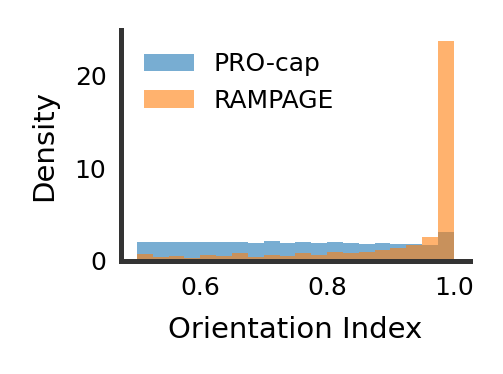

In [73]:
def plot_ois_by_data_type():
    plt.figure(figsize=(1.5,1), dpi=300)

    plt.hist(ois_procap, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(ois_cage, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.ylabel("Density", fontsize=7)
    plt.xlabel("Orientation Index", fontsize=7)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=6)
    
    plt.legend(fontsize=6, frameon=False)

    plt.show()
    
    
plot_ois_by_data_type()

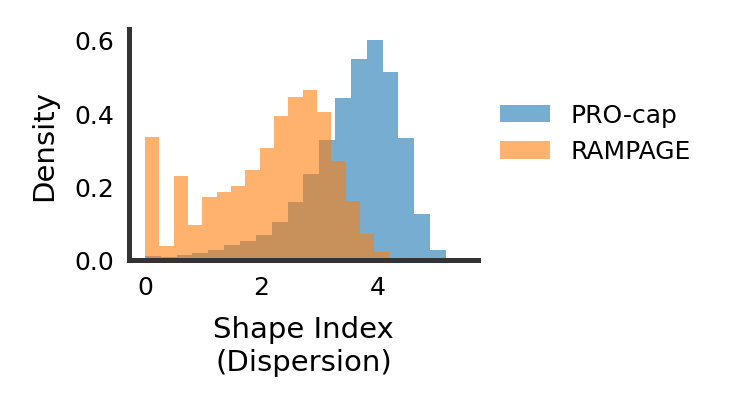

In [96]:
def plot_ses_by_data_type():
    plt.figure(figsize=(1.5,1), dpi=300)

    plt.hist(ses_procap, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(ses_cage, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.ylabel("Density", fontsize=7)
    plt.xlabel("Shape Index\n(Dispersion)", fontsize=7)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=6)
    
    plt.legend(fontsize=6, frameon=False, bbox_to_anchor=(1,0.55), loc="center left")

    plt.show()
    
    
plot_ses_by_data_type()

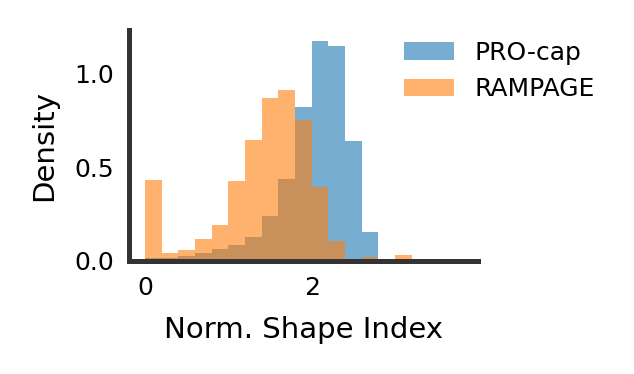

In [89]:
def plot_nses_by_data_type():
    plt.figure(figsize=(1.5,1), dpi=300)

    plt.hist(nses_procap, label="PRO-cap",
             alpha=0.6, bins=np.arange(0,4,0.2), density=True)
    plt.hist(nses_cage, label=cage_or_rampage.upper(),
             alpha=0.6, bins=np.arange(0,4,0.2), density=True)

    plt.ylabel("Density", fontsize=7)
    plt.xlabel("Norm. Shape Index", fontsize=7)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=6)
    
    plt.legend(fontsize=6, frameon=False, bbox_to_anchor=(1.4,1.05), loc="upper right")

    plt.show()
    
    
plot_nses_by_data_type()

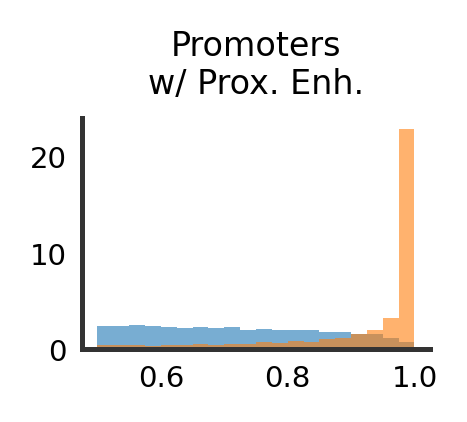

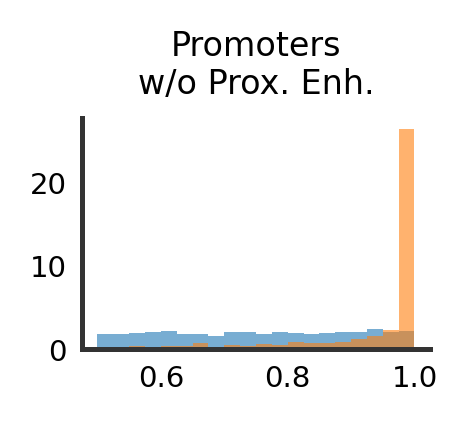

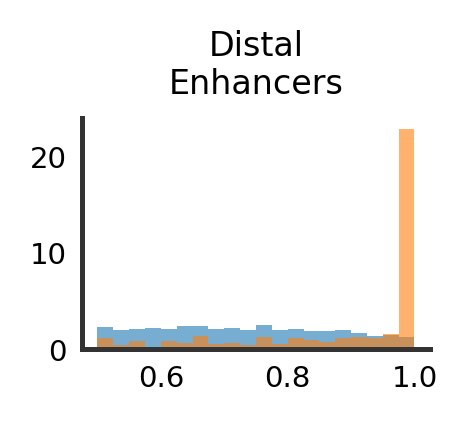

In [65]:
def plot_ois_by_data_type_ccre():

    annots_to_colors = {"PLS" : "#f94144",
                        "pELS" : "#ffbc42",
                        "dELS" : "#05668d",
                        "PLS_with_pELS" : "#f94144",
                        "PLS_no_pELS" : "#ffbc42"}

    annots_to_labels = {"PLS" : "Promoters",
                        "pELS" : "Proximal\nEnhancers",
                        "dELS" : "Distal\nEnhancers",
                        "PLS_with_pELS" : "Promoters\nw/ Prox. Enh.",
                        "PLS_no_pELS" : "Promoters\nw/o Prox. Enh."}

    annots_to_plot = ["PLS_with_pELS", "PLS_no_pELS", "dELS"]
    
    
    
    for annot_name in annots_to_plot:
        plt.figure(figsize=(1.5,1), dpi=300)
        
        ois_procap_to_plot = ois_procap[ccre_annots[annot_name]]
        ois_cage_to_plot = ois_cage[ccre_annots[annot_name]]
        
        plt.hist(ois_procap_to_plot, label="PRO-cap",
                 alpha=0.6, bins=20, density=True)
        plt.hist(ois_cage_to_plot, label=cage_or_rampage.upper(),
                 alpha=0.6, bins=20, density=True)
        
        plt.title(annots_to_labels[annot_name], fontsize=8)
        
        ax = plt.gca()
        ax.spines[["left", "bottom"]].set_linewidth(1.2)
        ax.spines[["left", "bottom"]].set_color("#333333")
        ax.spines[["top", "right"]].set_visible(False)
        ax.tick_params(length=0, labelsize=7)
    
        plt.show()
    
    
plot_ois_by_data_type_ccre()

In [66]:
from load_annotations_utils import find_peak_overlap

housekeeping_genes_bed = configs["procap"].proj_dir + "/annotations/hk_promoters_by_transcripts.bed"
hk_annots = find_peak_overlap(coords, housekeeping_genes_bed)

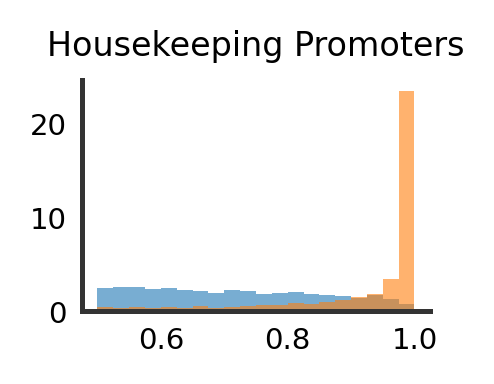

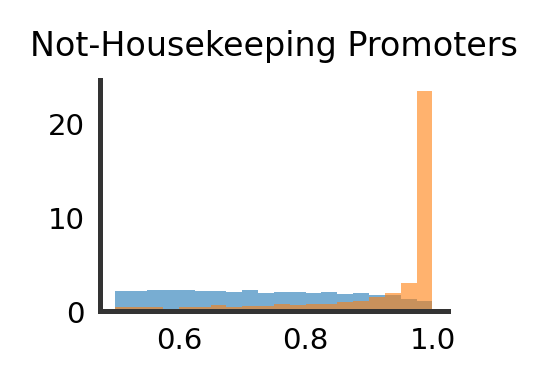

In [101]:
def plot_ois_by_data_type_hk():
    plt.figure(figsize=(1.5,1), dpi=300)

    ois_procap_to_plot = ois_procap[ccre_annots["PLS"] * hk_annots]
    ois_cage_to_plot = ois_cage[ccre_annots["PLS"] * hk_annots]

    plt.hist(ois_procap_to_plot, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(ois_cage_to_plot, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.title("Housekeeping Promoters", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)
    
    plt.show()
    
    
    plt.figure(figsize=(1.5,1), dpi=300)
    
    ois_procap_to_plot = ois_procap[ccre_annots["PLS"] * (~ hk_annots)]
    ois_cage_to_plot = ois_cage[ccre_annots["PLS"] * (~ hk_annots)]

    plt.hist(ois_procap_to_plot, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(ois_cage_to_plot, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.title("Not-Housekeeping Promoters", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)

    plt.show()
    
    
plot_ois_by_data_type_hk()

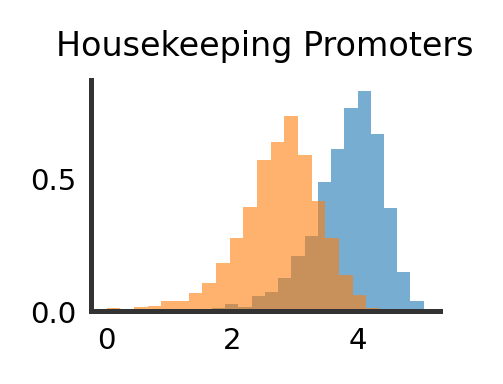

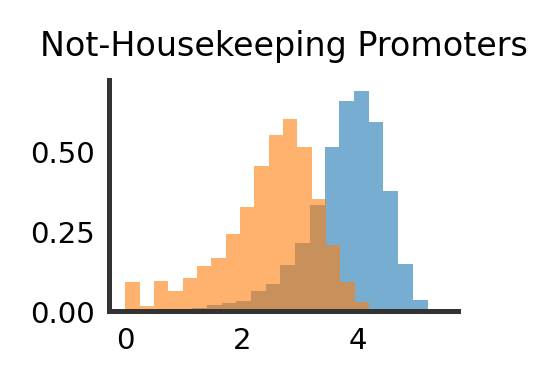

In [102]:
def plot_ses_by_data_type_hk():
    plt.figure(figsize=(1.5,1), dpi=300)

    ses_procap_to_plot = ses_procap[ccre_annots["PLS"] * hk_annots]
    ses_cage_to_plot = ses_cage[ccre_annots["PLS"] * hk_annots]

    plt.hist(ses_procap_to_plot, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(ses_cage_to_plot, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.title("Housekeeping Promoters", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)
    
    plt.show()
    
    
    plt.figure(figsize=(1.5,1), dpi=300)
    
    ses_procap_to_plot = ses_procap[ccre_annots["PLS"] * (~ hk_annots)]
    ses_cage_to_plot = ses_cage[ccre_annots["PLS"] * (~ hk_annots)]

    plt.hist(ses_procap_to_plot, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(ses_cage_to_plot, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.title("Not-Housekeeping Promoters", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)

    plt.show()
    
    
plot_ses_by_data_type_hk()

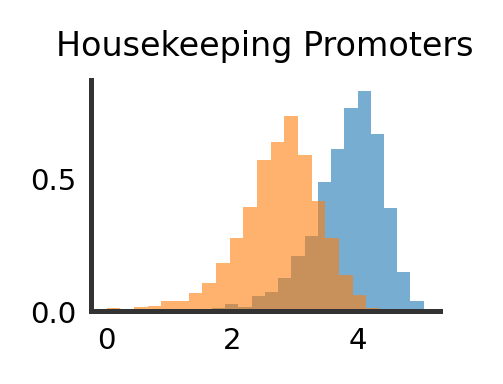

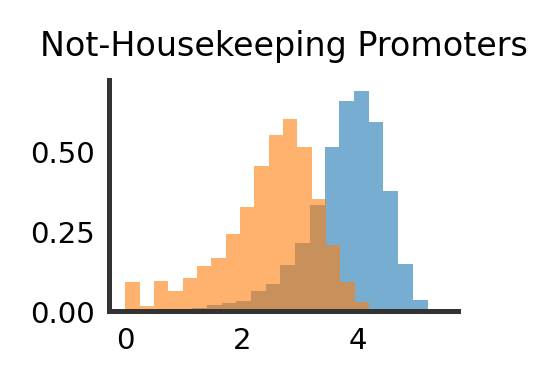

In [103]:
def plot_nses_by_data_type_hk():
    plt.figure(figsize=(1.5,1), dpi=300)

    nses_procap_to_plot = nses_procap[ccre_annots["PLS"] * hk_annots]
    nses_cage_to_plot = nses_cage[ccre_annots["PLS"] * hk_annots]

    plt.hist(nses_procap_to_plot, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(nses_cage_to_plot, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.title("Housekeeping Promoters", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)
    
    plt.show()
    
    
    plt.figure(figsize=(1.5,1), dpi=300)
    
    nses_procap_to_plot = nses_procap[ccre_annots["PLS"] * (~ hk_annots)]
    nses_cage_to_plot = nses_cage[ccre_annots["PLS"] * (~ hk_annots)]

    plt.hist(nses_procap_to_plot, label="PRO-cap",
             alpha=0.6, bins=20, density=True)
    plt.hist(nses_cage_to_plot, label=cage_or_rampage.upper(),
             alpha=0.6, bins=20, density=True)

    plt.title("Not-Housekeeping Promoters", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)

    plt.show()
    
    
plot_ses_by_data_type_hk()

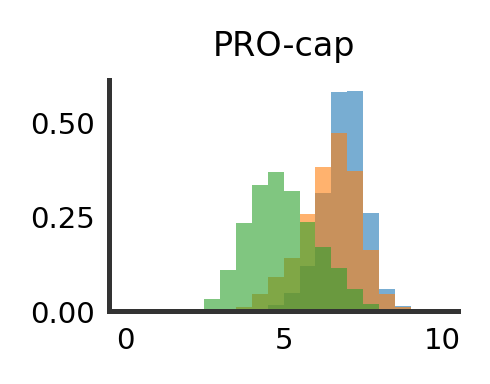

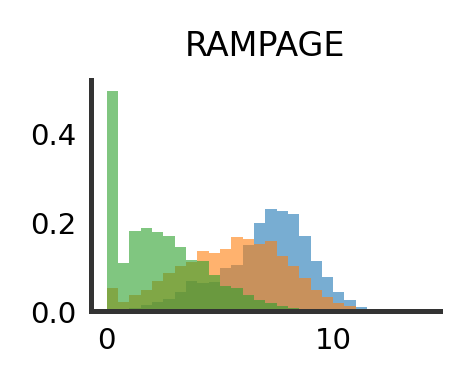

In [124]:
def plot_counts_by_data_type_hk():
    plt.figure(figsize=(1.5,1), dpi=300)

    logcounts_procap = np.log1p(true_profs_procap.sum(axis=(-1,-2)))
    logcounts_cage = np.log1p(true_profs_cage.sum(axis=(-1,-2)))

    plt.hist(logcounts_procap[ccre_annots["PLS"] * hk_annots], label="Housekeeping Promoters",
             alpha=0.6, bins=np.arange(0, np.max(logcounts_procap), 0.5), density=True)
    plt.hist(logcounts_procap[ccre_annots["PLS"] * (~ hk_annots)], label="Non-Housekeeping Promoters",
             alpha=0.6, bins=np.arange(0, np.max(logcounts_procap), 0.5), density=True)
    plt.hist(logcounts_procap[~ ccre_annots["PLS"]], label="Non-Promoters",
             alpha=0.6, bins=np.arange(0, np.max(logcounts_procap), 0.5), density=True)

    plt.title("PRO-cap", fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)
    
    plt.show()
    
    
    plt.figure(figsize=(1.5,1), dpi=300)
    
    plt.hist(logcounts_cage[ccre_annots["PLS"] * hk_annots], label="Housekeeping Promoters",
             alpha=0.6, bins=np.arange(0, np.max(logcounts_cage), 0.5), density=True)
    plt.hist(logcounts_cage[ccre_annots["PLS"] * (~ hk_annots)], label="Non-Housekeeping Promoters",
             alpha=0.6, bins=np.arange(0, np.max(logcounts_cage), 0.5), density=True)
    plt.hist(logcounts_cage[~ ccre_annots["PLS"]], label="Non-Promoters",
             alpha=0.6, bins=np.arange(0, np.max(logcounts_procap), 0.5), density=True)

    plt.title(cage_or_rampage.upper(), fontsize=8)

    ax = plt.gca()
    ax.spines[["left", "bottom"]].set_linewidth(1.2)
    ax.spines[["left", "bottom"]].set_color("#333333")
    ax.spines[["top", "right"]].set_visible(False)
    ax.tick_params(length=0, labelsize=7)

    plt.show()
    
    
plot_counts_by_data_type_hk()

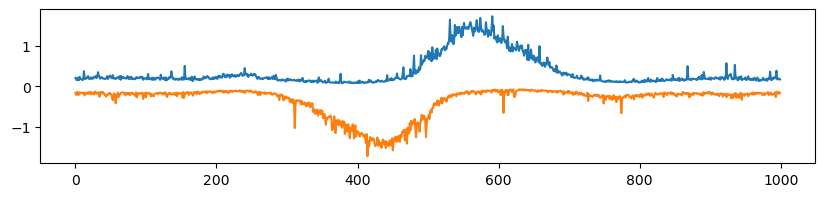

In [106]:
plt.figure(figsize=(10,2))

plt.plot(true_profs_procap.mean(axis=0)[0])
plt.plot(-1 * true_profs_procap.mean(axis=0)[1])
plt.show()

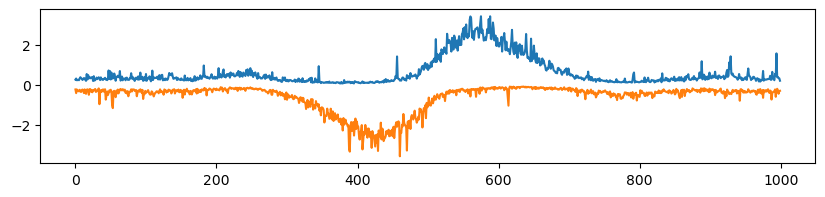

In [118]:
plt.figure(figsize=(10,2))

plt.plot(np.mean(true_profs_procap[ccre_annots["PLS"] * hk_annots], axis=0)[0])
plt.plot(-1 * np.mean(true_profs_procap[ccre_annots["PLS"] * hk_annots], axis=0)[1])
plt.show()

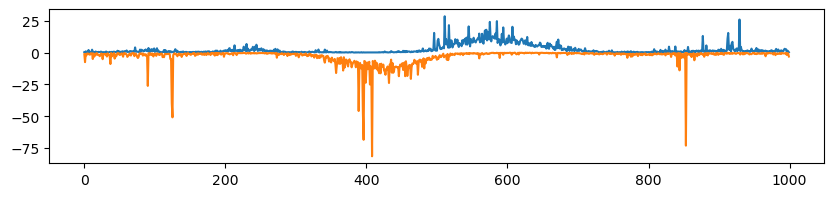

In [119]:
plt.figure(figsize=(10,2))

plt.plot(np.mean(true_profs_cage[ccre_annots["PLS"] * hk_annots], axis=0)[0])
plt.plot(-1 * np.mean(true_profs_cage[ccre_annots["PLS"] * hk_annots], axis=0)[1])
plt.show()

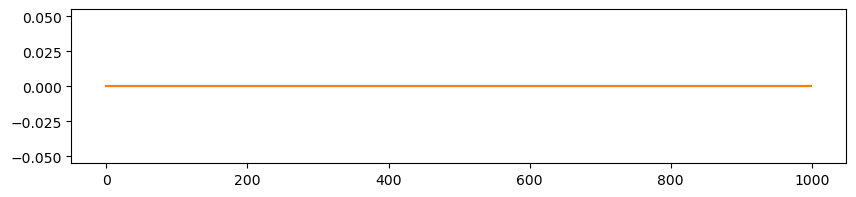

In [114]:
plt.figure(figsize=(10,2))

plt.plot(np.median(true_profs_cage, axis=0)[0])
plt.plot(-1 * np.median(true_profs_cage, axis=0)[1])
plt.show()

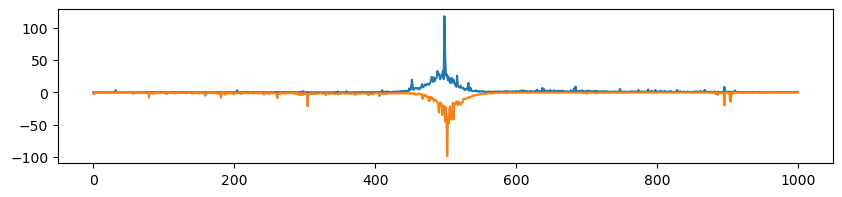

In [108]:
plt.figure(figsize=(10,2))

plt.plot(true_profs_cage_cagepeaks.mean(axis=0)[0])
plt.plot(-1 * true_profs_cage_cagepeaks.mean(axis=0)[1])
plt.show()